# Data Cleaning

In [1]:
import pandas as pd

file_path = '../data/raw/litigation_cases.xlsx'
df = pd.read_excel(file_path, header=5)
df = df.iloc[:-7]

In [2]:
df.head(10)

LIT Leave Decision Date - Year    Country of Citizenship  \
0                           2023                     India   
1                           2021                      Fiji   
2                           2023                    Russia   
3                           2023     Republic of Indonesia   
4                           2018                   Georgia   
5                           2019                   Nigeria   
6                           2020  United States of America   
7                           2018                   Lebanon   
8                           2022                     India   
9                           2021                   Croatia   

             LIT Leave Decision Desc LIT Case Type Group Desc  \
0                 Dismissed at Leave            RAD Decisions   
1                            Allowed            IAD Decisions   
2  Discontinued - Withdrawn at Leave     Visa Officer Refusal   
3    Discontinued - Consent at Leave             HC Decisions   
4    Discontinued - Consent at Leave     Visa Officer Refusal   
5                 Dismissed at Leave                     PRRA   
6                            Allowed            RAD Decisions   
7                 Dismissed at Leave            RAD Decisions   
8  Discontinued - Withdrawn at Leave            Removal Order   
9                            Allowed             HC Decisions   

              LIT Case Type Desc LIT Filed By Desc LIT Tribunal Type Desc  \
0   RAD-Dismissed-Confirmed-Same  Person Concerned          Federal Court   
1              IAD-Removal Order  Person Concerned          Federal Court   
2          Visa Officer Decision  Person Concerned          Federal Court   
3            HC Refusal-Perm Res  Person Concerned          Federal Court   
4          Visa Officer Decision  Person Concerned          Federal Court   
5              PRRA-Not Eligible  Person Concerned          Federal Court   
6   RAD-Dismissed-Confirmed-Same  Person Concerned          Federal Court   
7  RAD-Dismissed-Confirmed-Other  Person Concerned          Federal Court   
8  Minister-Other / Other Admin.  Person Concerned          Federal Court   
9            HC Refusal-Perm Res  Person Concerned          Federal Court   

  LIT Primary Office Type Desc  \
0                       Inland   
1                Port of Entry   
2        International Network   
3                       Inland   
4        International Network   
5                       Inland   
6                       Inland   
7                       Inland   
8        International Network   
9                       Inland   

             LIT Primary Office Regional Group Desc  LIT Litigation Count  
0                                IRCC Vancouver Adm                  12.0  
1                          Pacific Highway District                   1.0  
2                                       Unspecified                   7.0  
3     Humanitarian Migration and Integrity Division                   2.0  
4                                       Unspecified                   2.0  
5     Humanitarian Migration and Integrity Division                   1.0  
6  Enforcement and Intelligence Operations Division                   5.0  
7                                 Ontario West Area                   2.0  
8                                       Unspecified                   3.0  
9     Humanitarian Migration and Integrity Division                   2.0

# EDA

Getting a general idea of the data

### 1. Missing Value Check
   - The dataset does not contain any missing values across all columns, which ensure the data integrity for further analysis.

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values


LIT Leave Decision Date - Year            0
Country of Citizenship                    0
LIT Leave Decision Desc                   0
LIT Case Type Group Desc                  0
LIT Case Type Desc                        0
LIT Filed By Desc                         0
LIT Tribunal Type Desc                    0
LIT Primary Office Type Desc              0
LIT Primary Office Regional Group Desc    0
LIT Litigation Count                      0
dtype: int64

### 2. Data Types and Features
- The dataset contains 8 categorical columns and 1 numeric column, and the specific columns are listed below.
- Since the count of litigations should always be a whole number, the LIT Litigation Count column should be converted to an integer type from float64.

In [4]:
# Basic overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13781 entries, 0 to 13780
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LIT Leave Decision Date - Year          13781 non-null  object 
 1   Country of Citizenship                  13781 non-null  object 
 2   LIT Leave Decision Desc                 13781 non-null  object 
 3   LIT Case Type Group Desc                13781 non-null  object 
 4   LIT Case Type Desc                      13781 non-null  object 
 5   LIT Filed By Desc                       13781 non-null  object 
 6   LIT Tribunal Type Desc                  13781 non-null  object 
 7   LIT Primary Office Type Desc            13781 non-null  object 
 8   LIT Primary Office Regional Group Desc  13781 non-null  object 
 9   LIT Litigation Count                    13781 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.1+ MB
None


In [5]:
# converting LIT Litigation Count to integer 
df['LIT Litigation Count'] = df['LIT Litigation Count'].astype(int)

### 2.1 For Categorical Features
- The table below shows the number of unique values for each categorical feature.
- For the distribution of Country of Citizenship, India leads with the highest count (947), followed by Nigeria (838) and the People's Republic of China (662).
- For LIT Leave Decision Desc, "Dismissed at Leave" is the most frequent category (6011), followed by "Allowed" (3148).
- LIT Case Type Group Desc highlights "RAD Decisions" (3403) and "Visa Officer Refusal" (2394) as the most common categories.
- The distribution of LIT Case Type Desc shows "RAD-Dismissed-Confirmed-Same" (2663) and "Visa Officer Decision" (2394) as the dominant types.
- In LIT Filed By Desc, "Person Concerned" leads with 13120 cases.
- LIT Tribunal Type Desc is dominated by "Federal Court" with 13672 entries.
- LIT Primary Office Type Desc has "Inland" as the most common type (8993).
- For LIT Primary Office Regional Group Desc, "Unspecified" (3071) is the highest, followed by "Enforcement and Intelligence Operations Division" (2320).

In [6]:
categorical_columns = df.select_dtypes(include='object').columns
unique_values = df[categorical_columns].nunique()
print(unique_values)

LIT Leave Decision Date - Year              6
Country of Citizenship                    180
LIT Leave Decision Desc                     8
LIT Case Type Group Desc                   17
LIT Case Type Desc                         62
LIT Filed By Desc                           4
LIT Tribunal Type Desc                      4
LIT Primary Office Type Desc                3
LIT Primary Office Regional Group Desc     44
dtype: int64


Distribution for LIT Leave Decision Date - Year:
LIT Leave Decision Date - Year
2021    2641
2019    2582
2022    2536
2018    2356
2023    2105
2020    1561
Name: count, dtype: int64


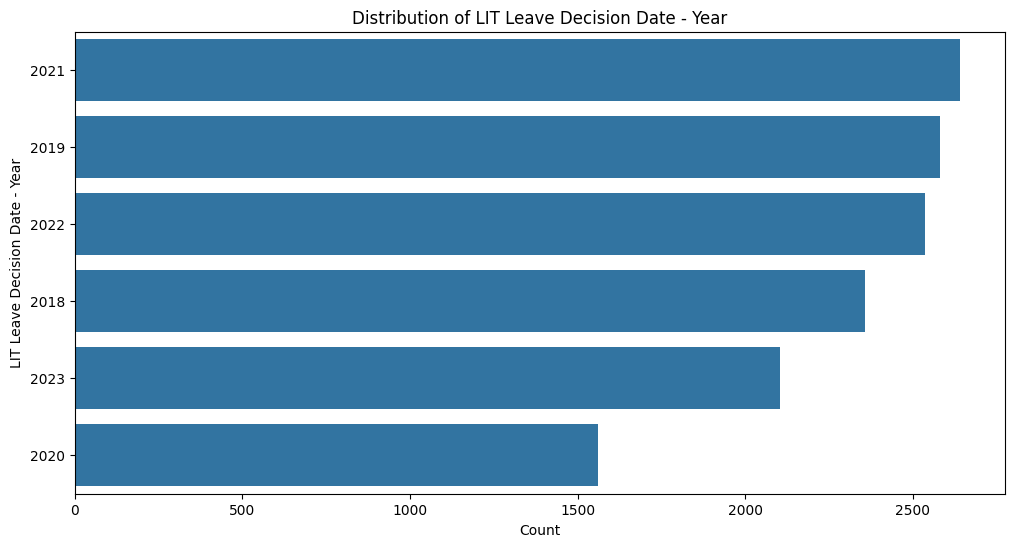

Distribution for Country of Citizenship:
Country of Citizenship
India                         947
Nigeria                       838
People's Republic of China    662
Pakistan                      497
Mexico                        420
                             ... 
Vanuatu                         1
Luxembourg                      1
Bhutan                          1
Macao SAR                       1
Iceland                         1
Name: count, Length: 180, dtype: int64


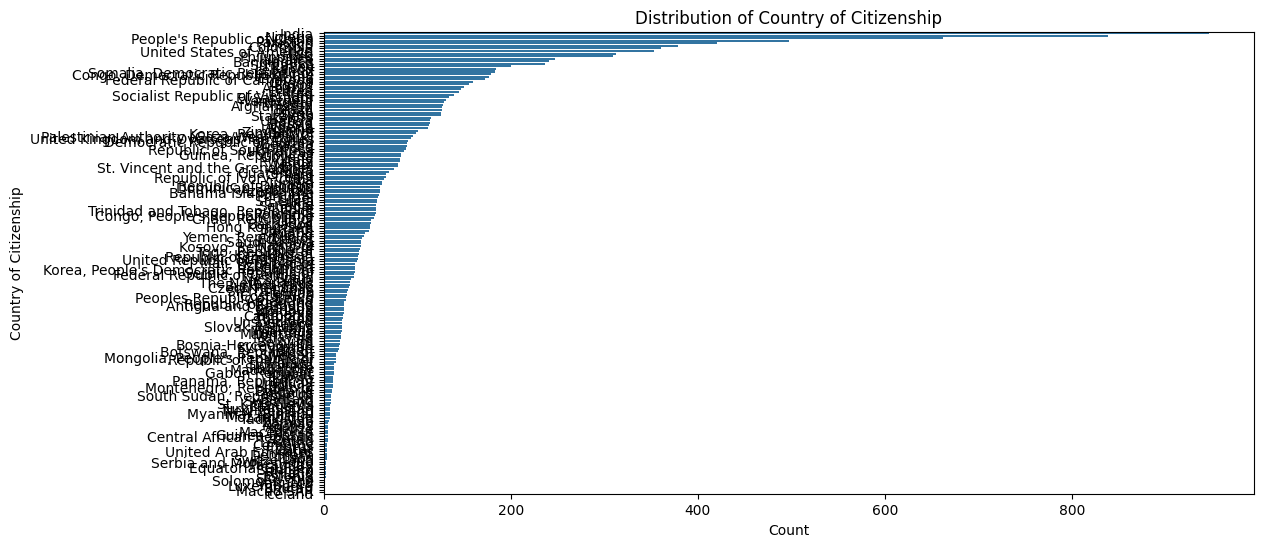

Distribution for LIT Leave Decision Desc:
LIT Leave Decision Desc
Dismissed at Leave                   6011
Allowed                              3148
Discontinued - Withdrawn at Leave    2861
Discontinued - Consent at Leave      1454
Allowed - Consent                     260
Not Started at Leave                   37
No Leave Required                       8
Leave Exception                         2
Name: count, dtype: int64


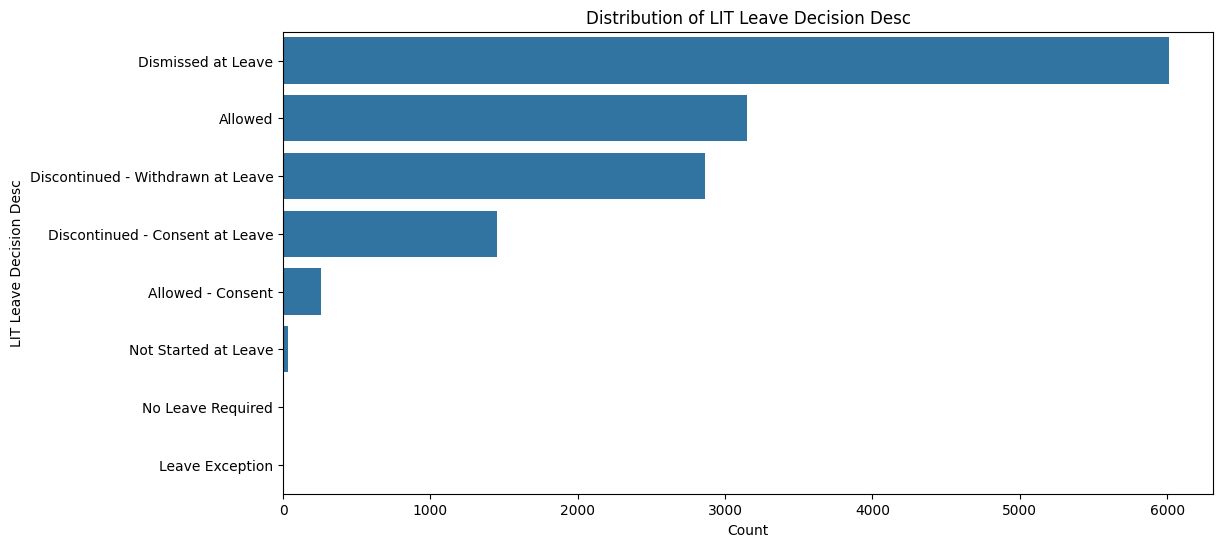

Distribution for LIT Case Type Group Desc:
LIT Case Type Group Desc
RAD Decisions           3403
Visa Officer Refusal    2394
Removal Order           1965
RPD Decisions           1741
HC Decisions            1091
PRRA                     963
Mandamus                 828
Removal Arrangements     568
IAD Decisions            441
ID Decisions             176
Other                     88
Refugee Eligibility       41
In-Canada Classes         35
Detention                 24
Citizenship Program       20
DFN                        2
Danger Opinions            1
Name: count, dtype: int64


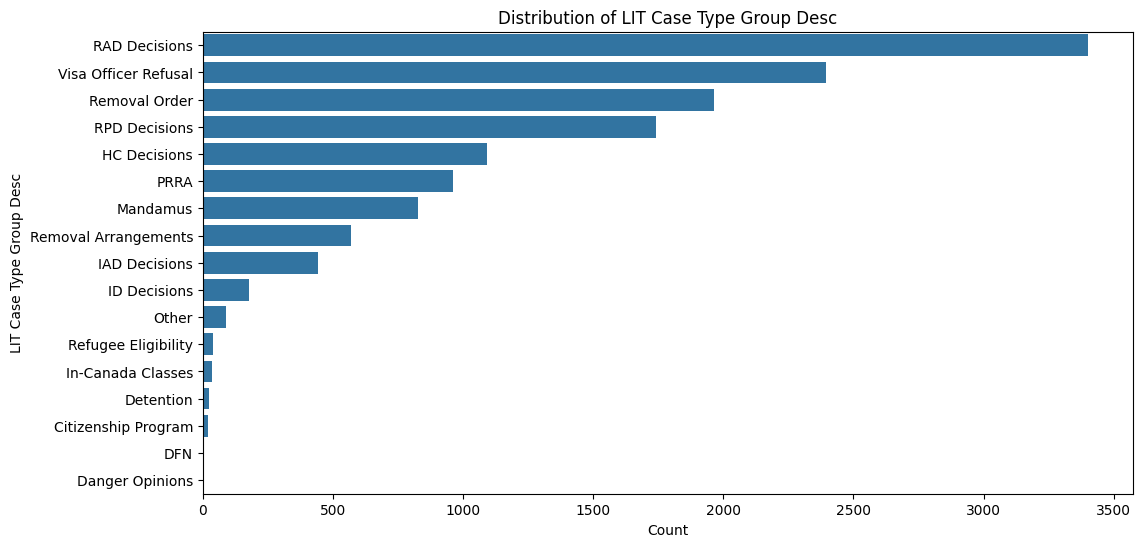

Distribution for LIT Case Type Desc:
LIT Case Type Desc
RAD-Dismissed-Confirmed-Same     2663
Visa Officer Decision            2394
Minister-Other / Other Admin.    1728
RPD-Not CR/Protected Person      1210
HC Refusal-Perm Res              1081
                                 ... 
Renunciation 9(1)-PS Decision       1
ICLC-Spouse                         1
MO-To effect Removal Order of       1
Minor Grant - PS Decision           1
ID-Non-Disclosure                   1
Name: count, Length: 62, dtype: int64


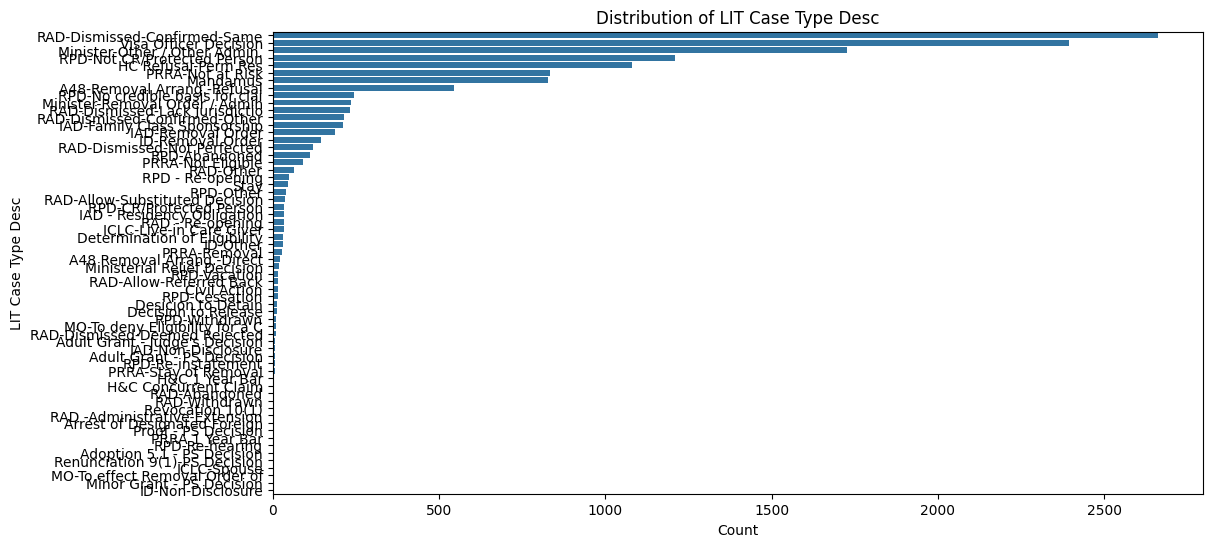

Distribution for LIT Filed By Desc:
LIT Filed By Desc
Person Concerned    13120
Third Party           451
Minister - CIC        154
Minister - CBSA        56
Name: count, dtype: int64


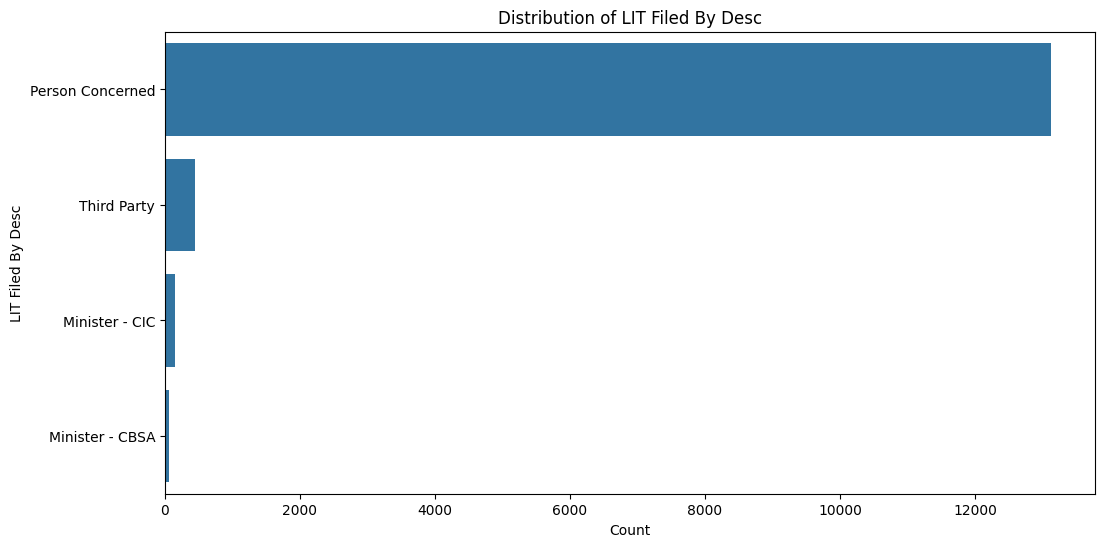

Distribution for LIT Tribunal Type Desc:
LIT Tribunal Type Desc
Federal Court              13672
Federal Court of Appeal       96
Supreme Court of Canada       12
UNHRC                          1
Name: count, dtype: int64


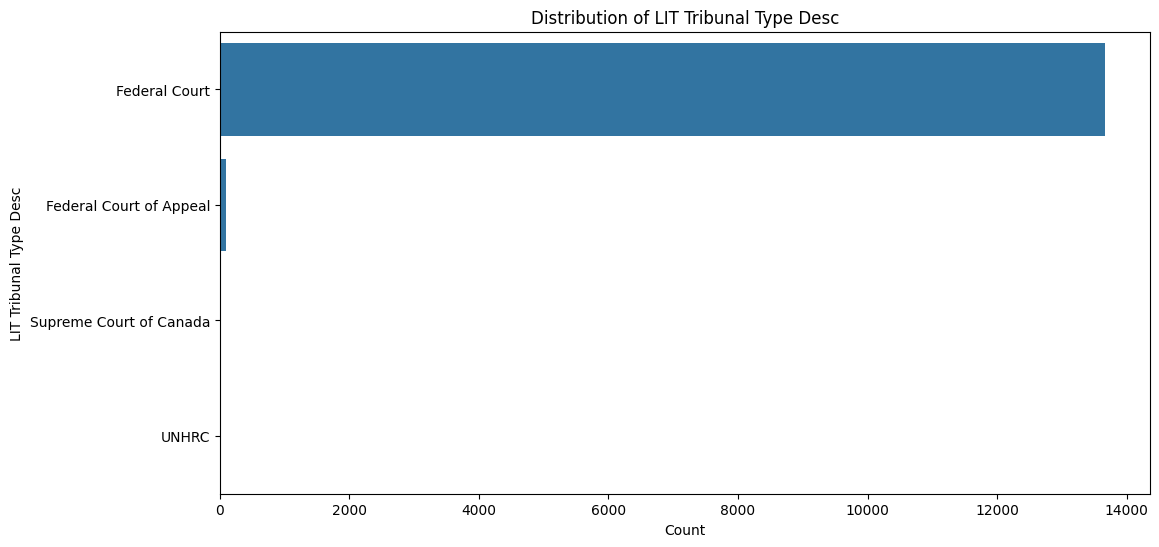

Distribution for LIT Primary Office Type Desc:
LIT Primary Office Type Desc
Inland                   8993
Port of Entry            2529
International Network    2259
Name: count, dtype: int64


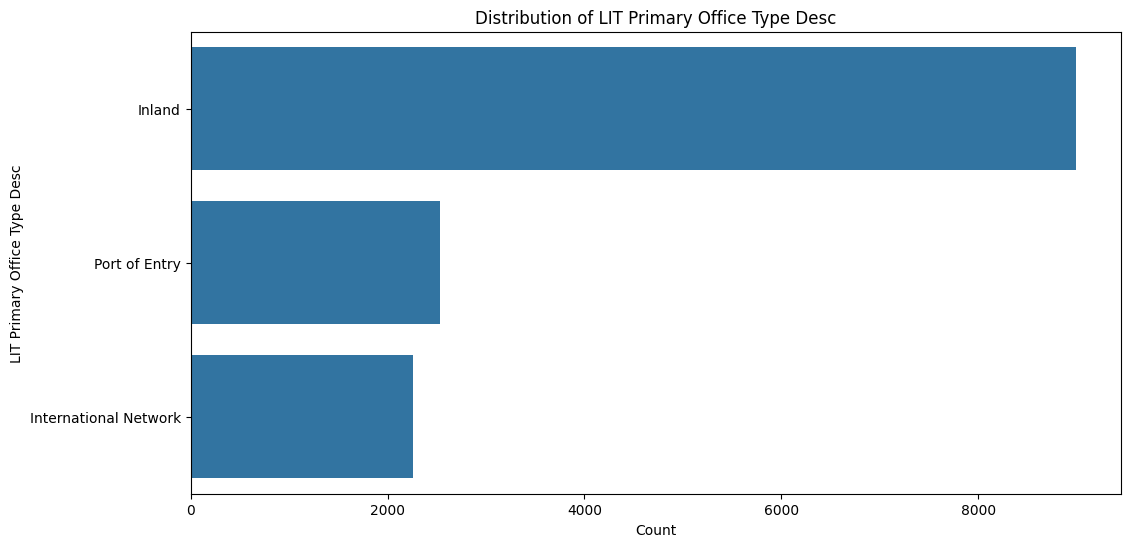

Distribution for LIT Primary Office Regional Group Desc:
LIT Primary Office Regional Group Desc
Unspecified                                                                   3071
Enforcement and Intelligence Operations Division                              2320
Humanitarian Migration and Integrity Division                                 2248
GTA West IRCC                                                                 1013
Montréal Facilitation Center                                                   712
Case Processing Centre Edmonton                                                611
Montérégie Border District                                                     581
Fort Erie District                                                             459
Passenger Operations District                                                  406
Regional HQ Prairies NT                                                        404
Ontario West Area                                                         

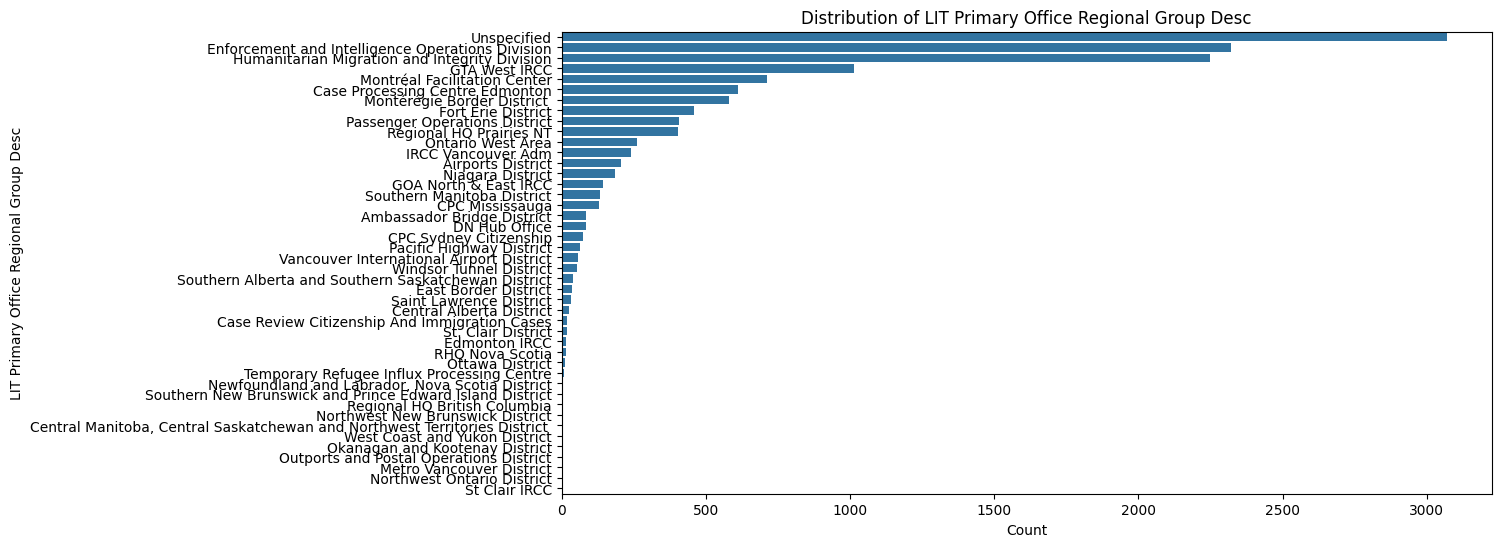

In [7]:
for column in categorical_columns:
    print(f"Distribution for {column}:")
    print(df[column].value_counts())
    plt.figure(figsize=(12, 6)) 
    sns.countplot(y=column, data=df, order=df[column].value_counts().index) 
    plt.title(f'Distribution of {column}') 
    plt.xlabel('Count')  
    plt.ylabel(column)  
    plt.show()

### 2.2 For Numerical Features:
- Most cases have relatively low litigation counts, but a few outliers show very high values.
- The presence of outliers suggests that there are cases with exceptional circumstances or rare events, which should be considered during analysis to avoid bias in interpretation.

In [8]:
numerical_columns = df.select_dtypes(include='number').columns
print(df[numerical_columns].describe())


       LIT Litigation Count
count          13781.000000
mean               3.505406
std               14.636497
min                1.000000
25%                1.000000
50%                1.000000
75%                3.000000
max              736.000000


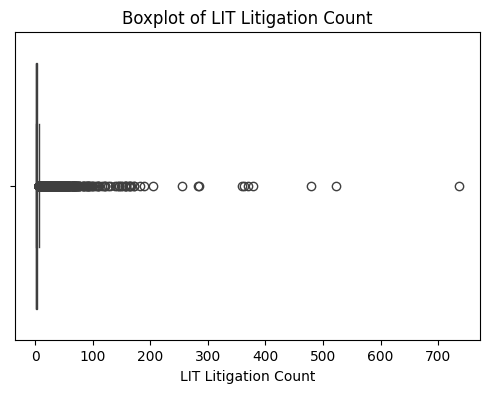

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


### 3. Correlation Between Features

- For the 'Country of Citizenship' column, filter for the top 10 most frequent countries to avoid clutter in the heatmap. For other categorical columns, analyze their relationships using cross-tabulation and visualize the results with heatmaps weighted by LIT Litigation Count.
- The only numerical feature, 'LIT Litigation Count,' is analyzed in relation to categorical features using boxplots.
- Some insights into the relationship between LIT Case Type Desc and other features; for further insights into the rest of the features, please see the heatmap below:
  - Most cases are processed in the Federal Court, with certain case types (like RAD Decisions and Visa Officer Refusal) being more prominent in specific tribunals.
  - A large number of cases in categories like RAD Decisions and RPD Decisions result in "Dismissed at Leave" or "Discontinued - Withdrawn at Leave" decisions.
  - A large volume of cases are filed by the Minister-CBSA, particularly for RAD and RPD decisions.
  - "Inland" and "Port of Entry" are the primary locations for many case types, with "RAD Decisions" and "Visa Officer Refusal" cases being heavily concentrated in the "International Network" region.
  - The interrelation between various case types reveals that RAD Decisions and RPD Decisions are heavily interconnected with other types, particularly for "Removal Orders" and "Visa Officer Refusals."
  - A large portion of cases, particularly those under RAD Decisions and Visa Officer Refusal, are handled by the Federal Court.

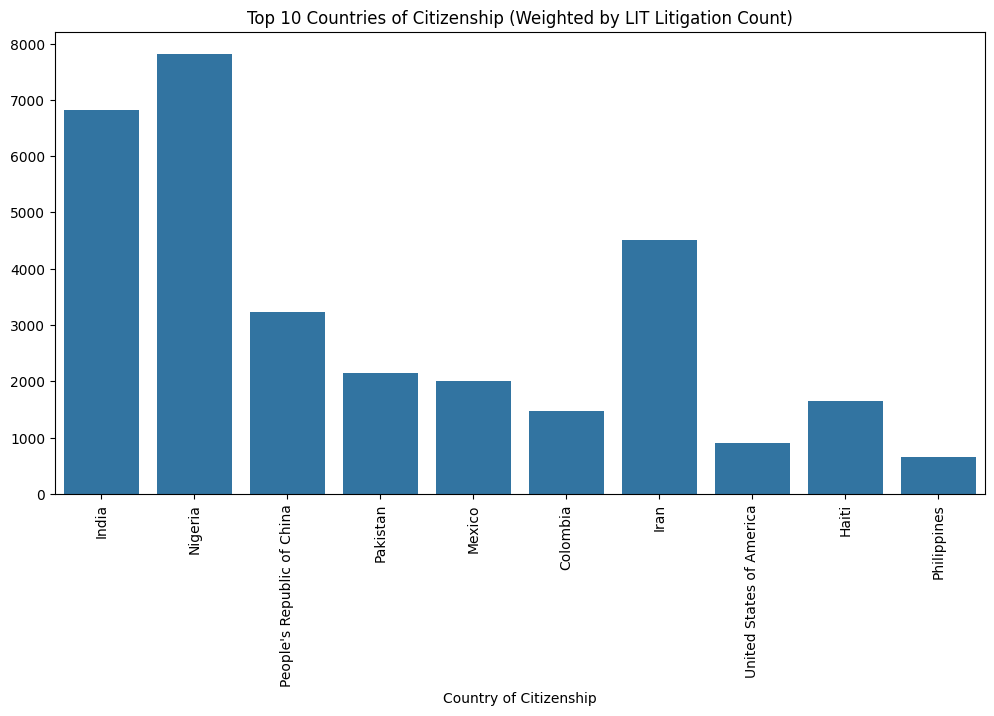

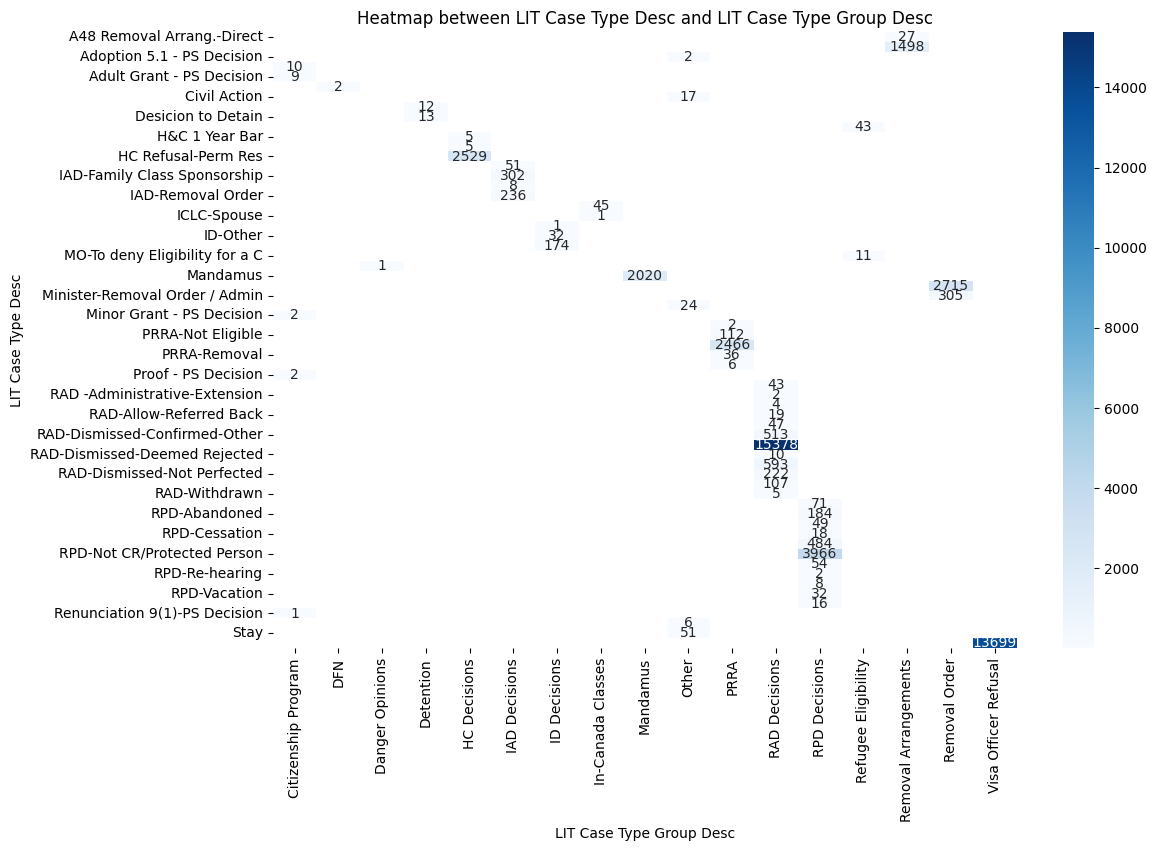

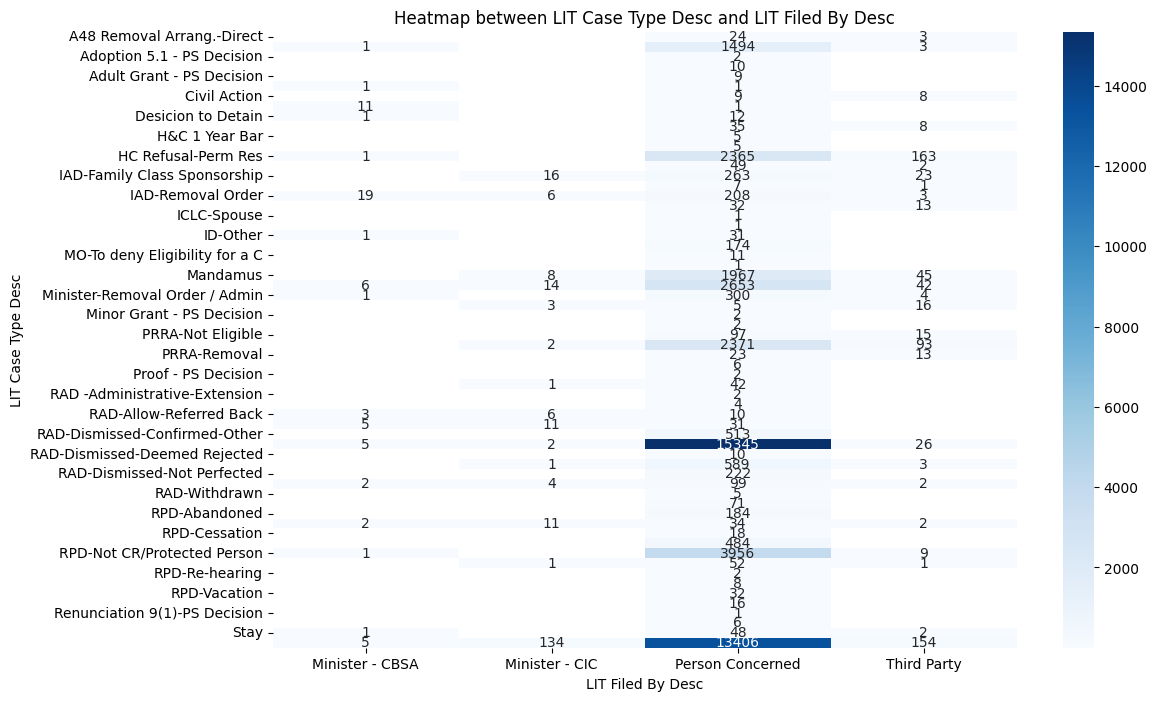

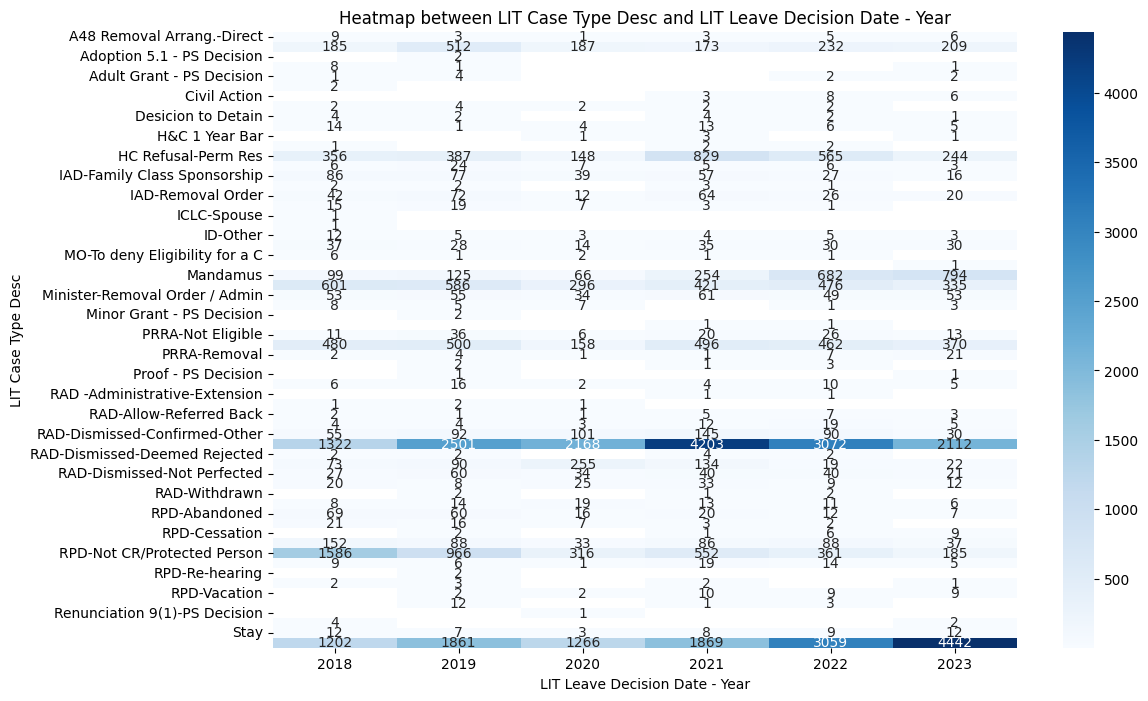

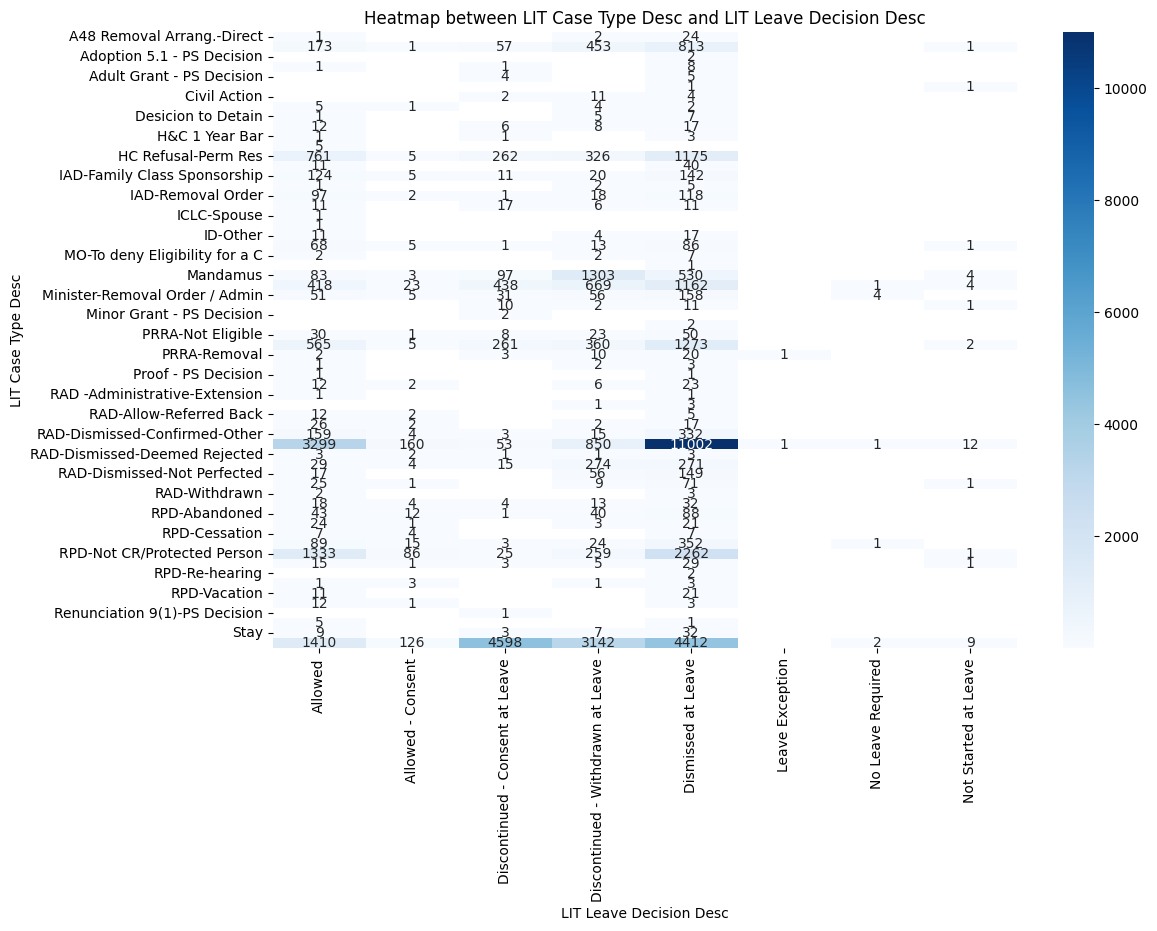

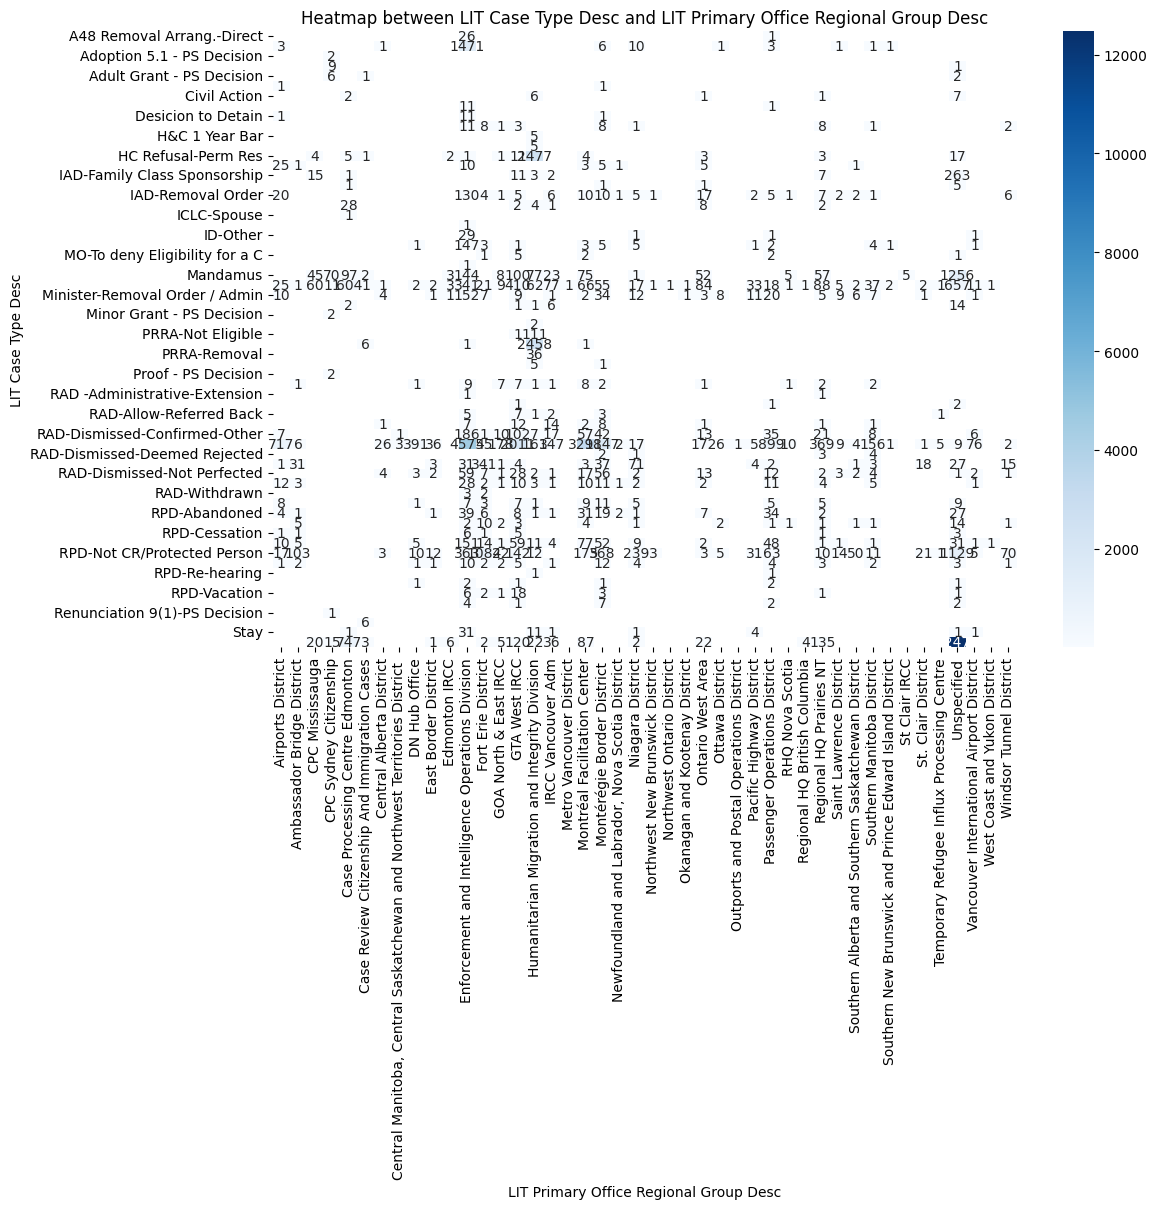

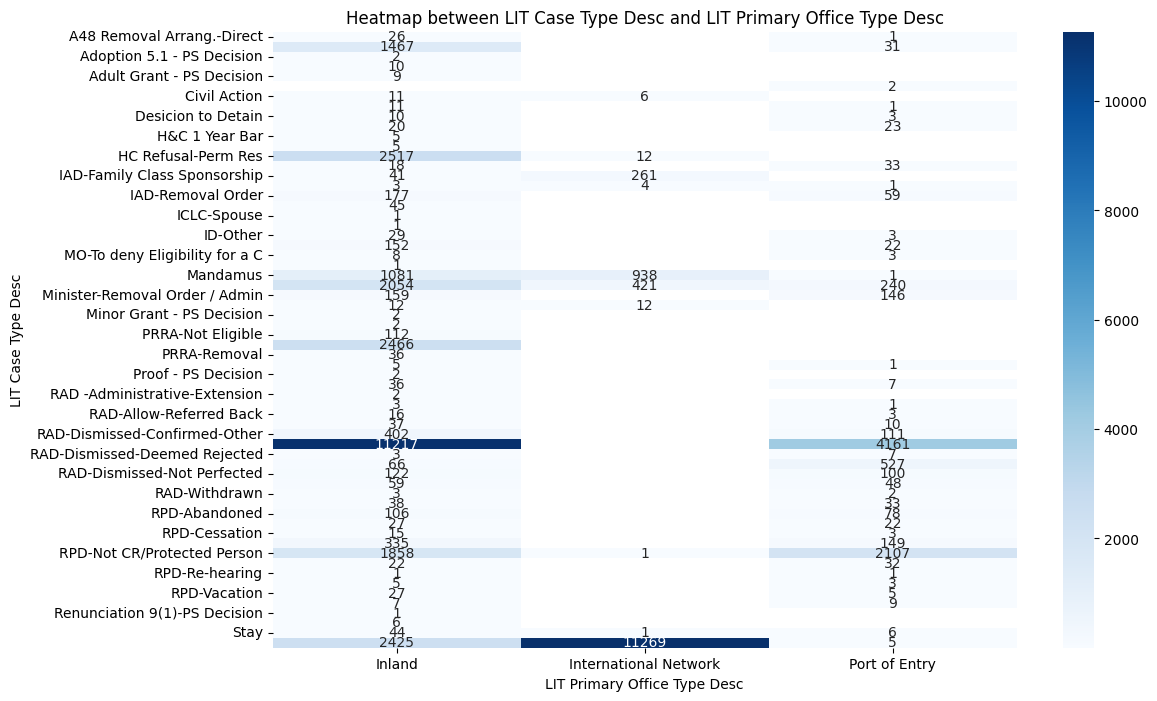

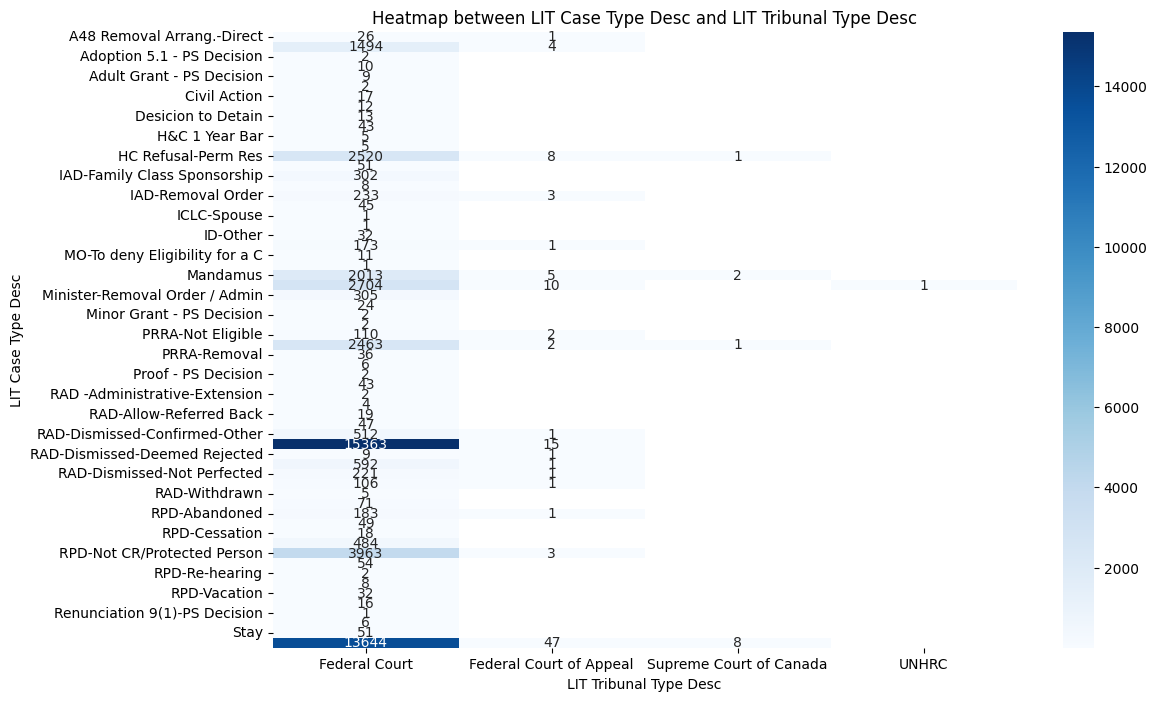

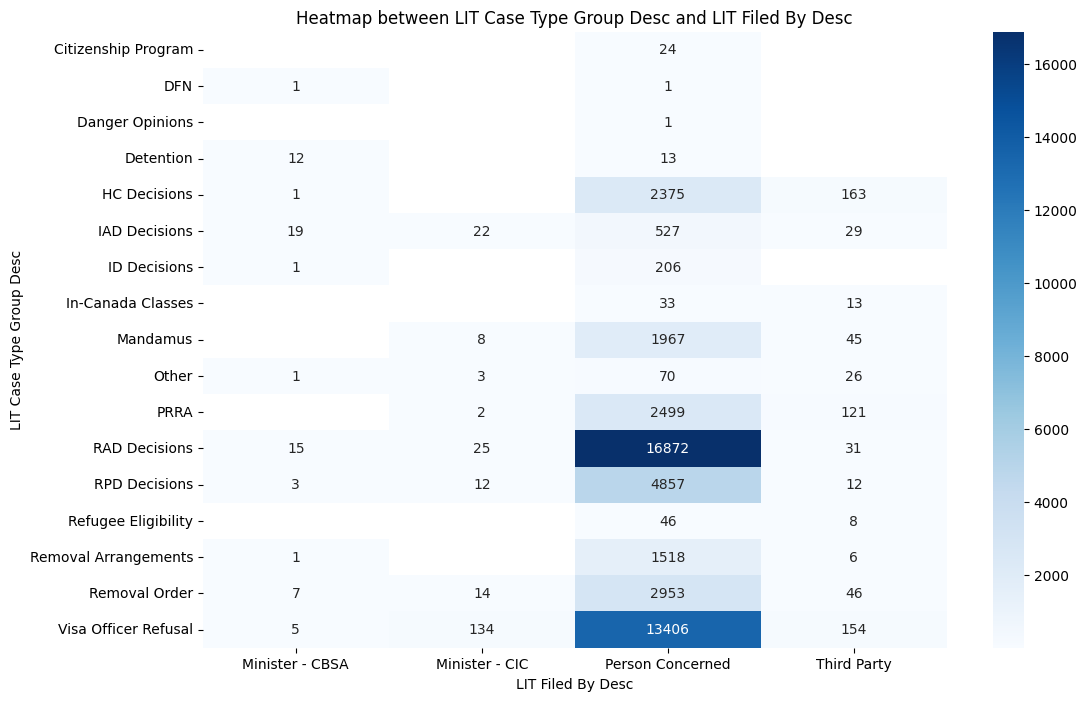

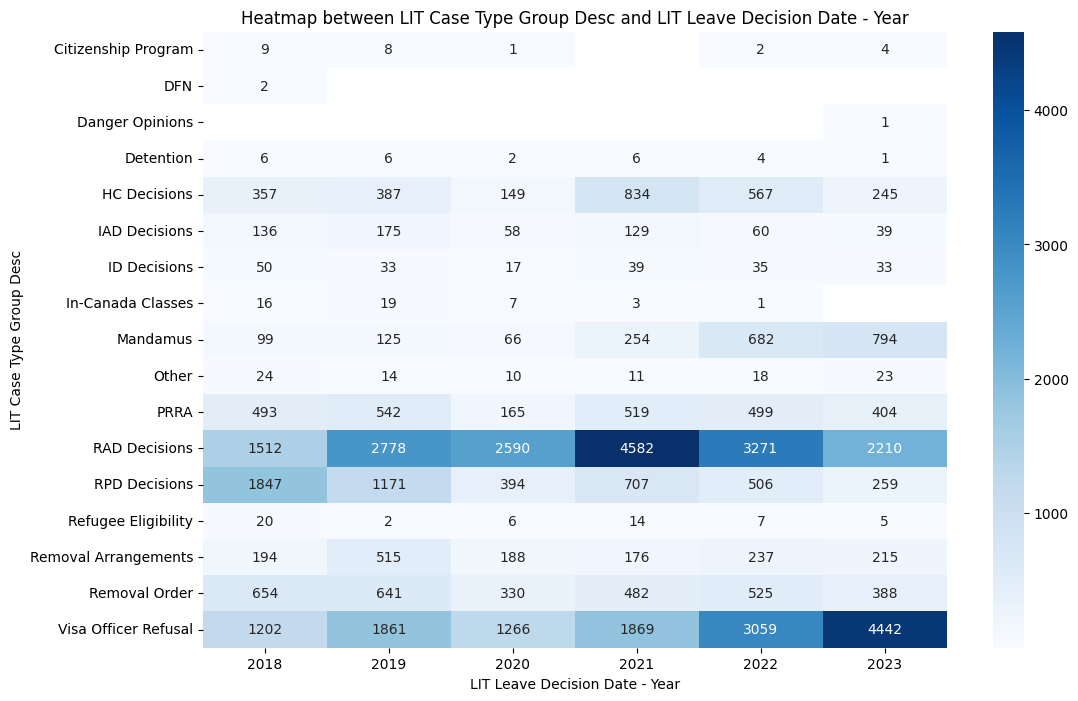

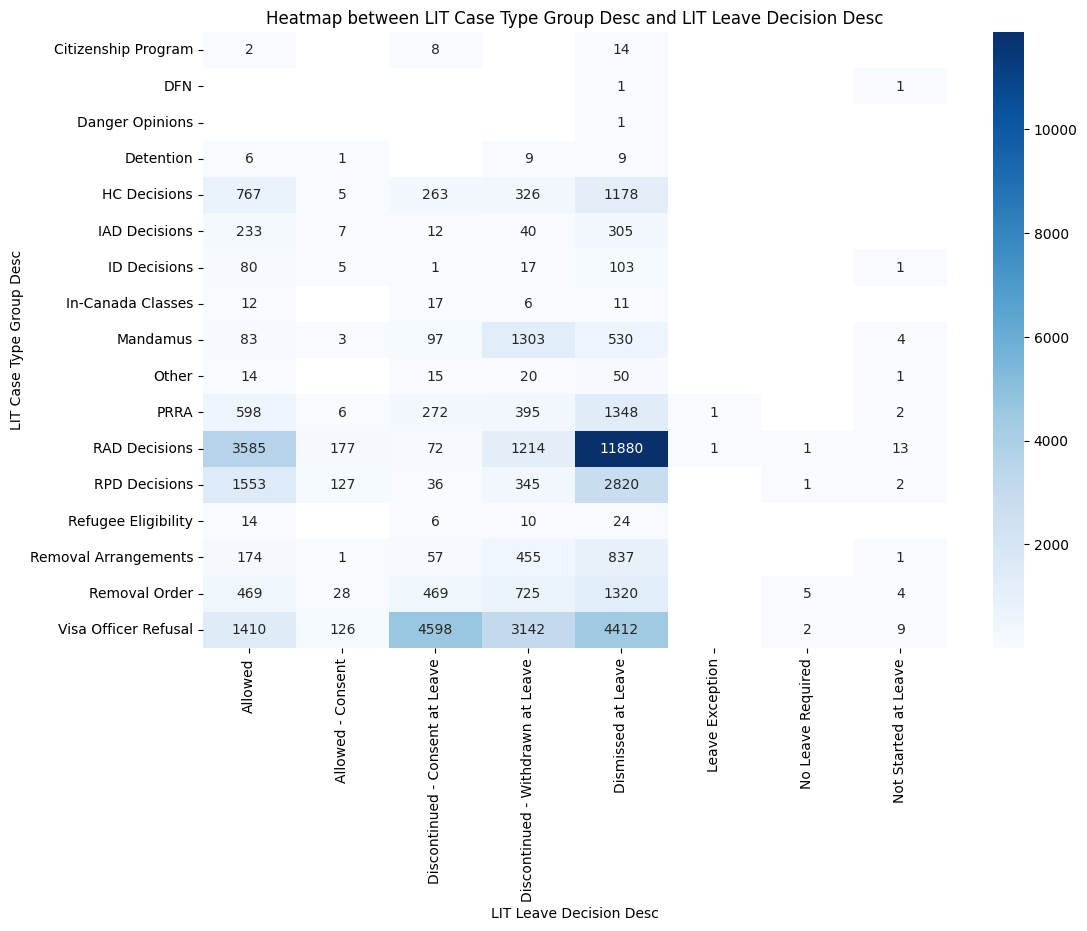

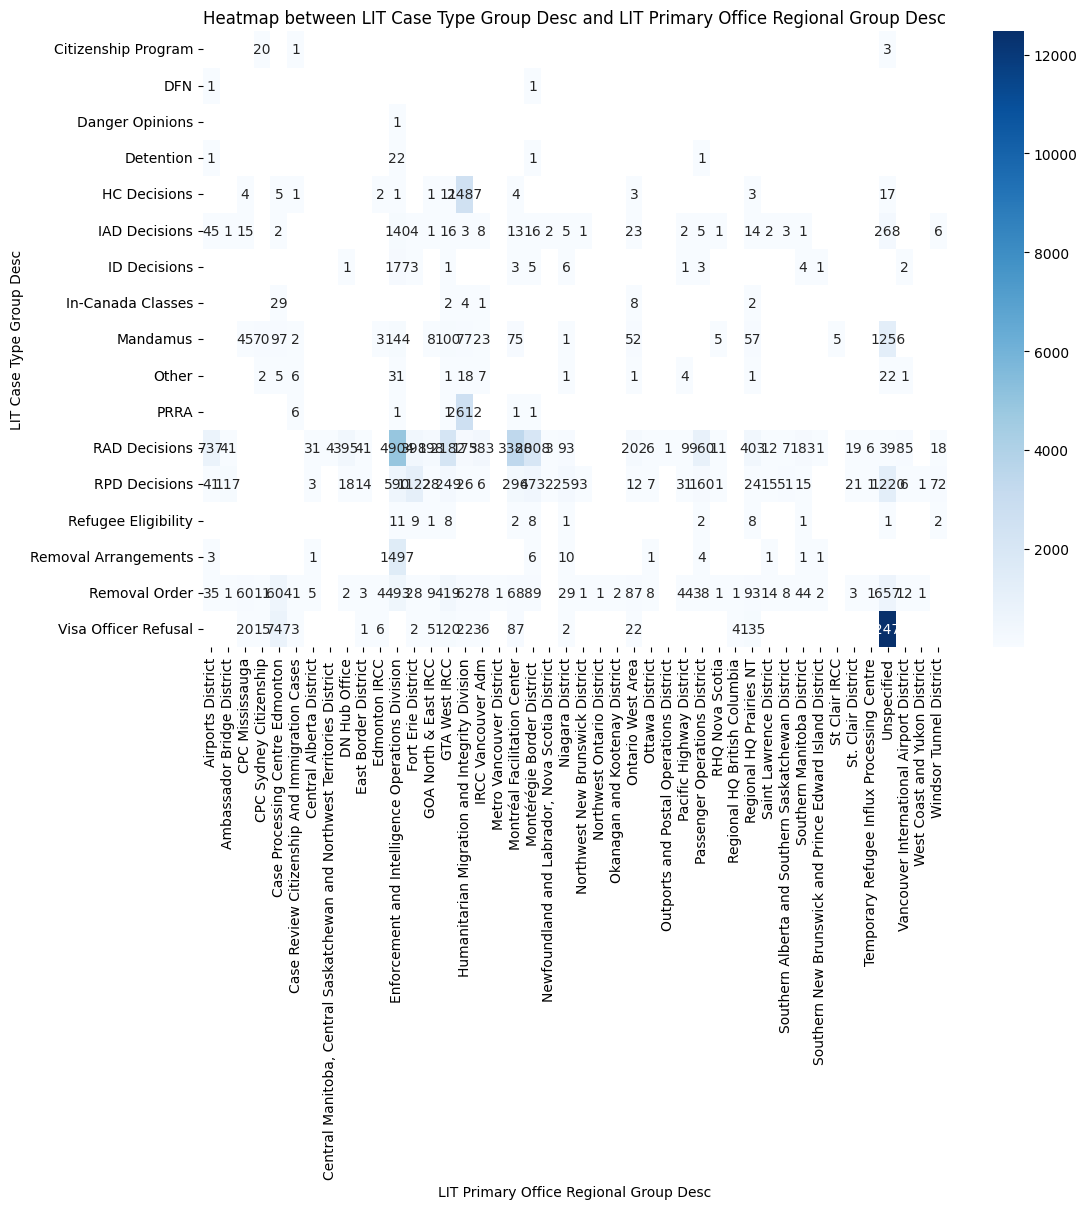

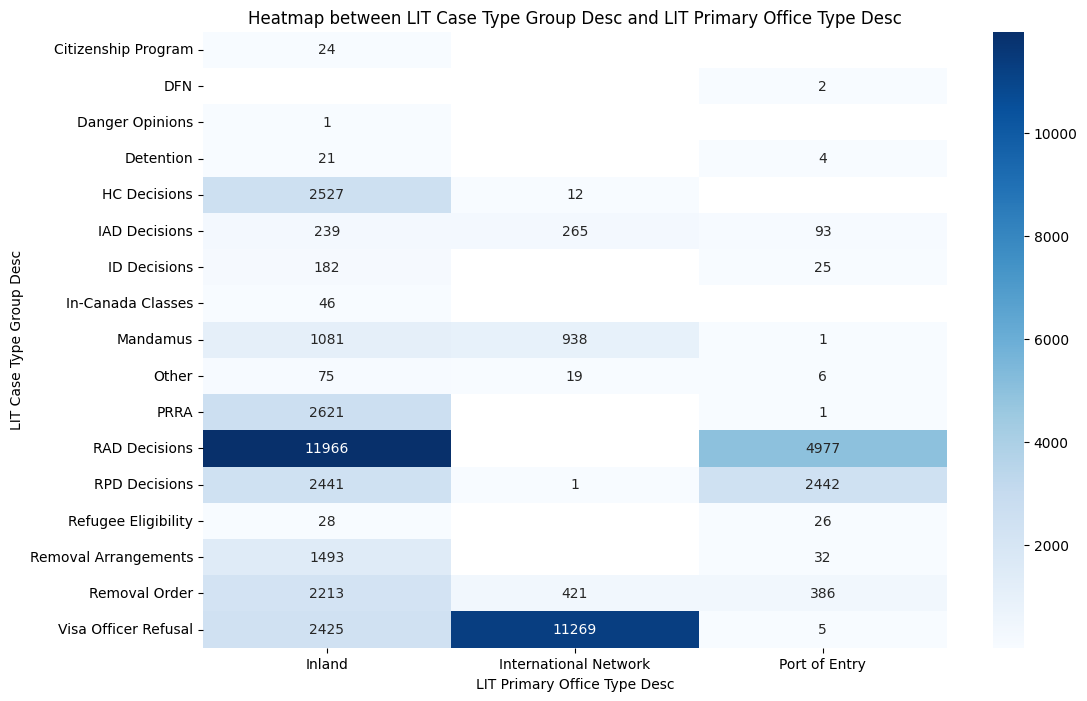

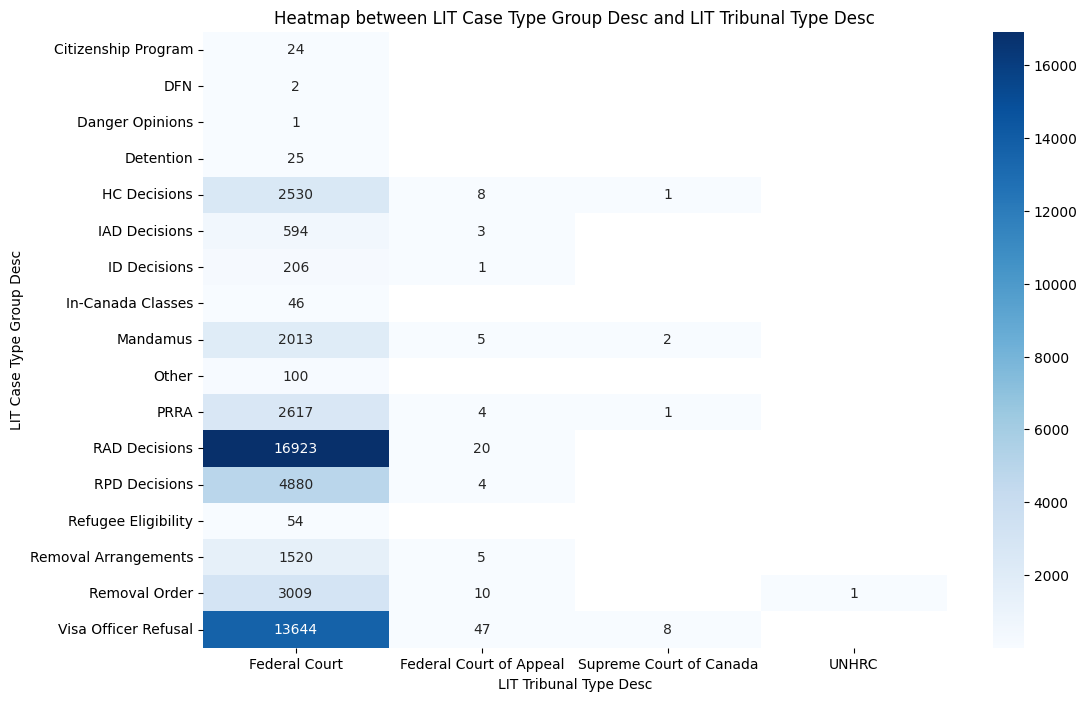

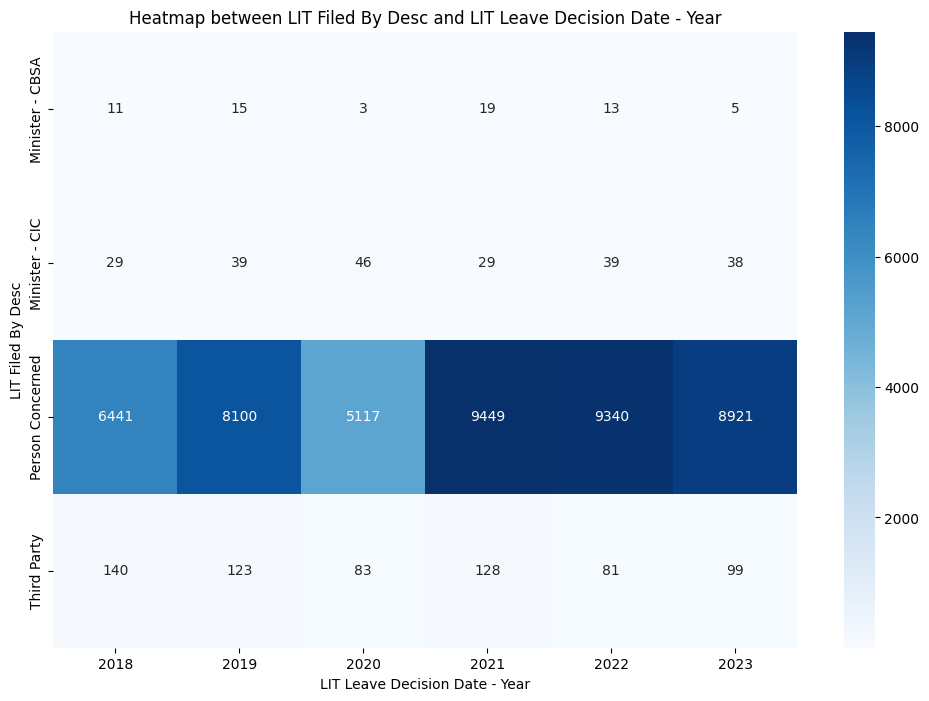

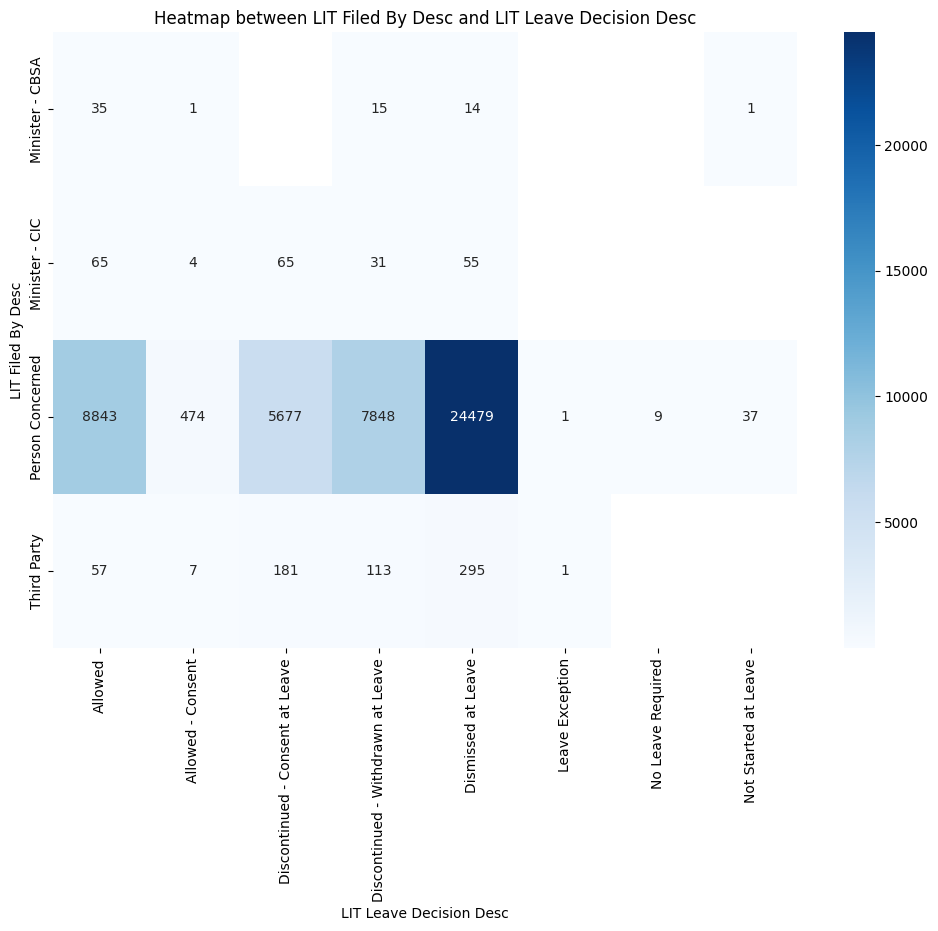

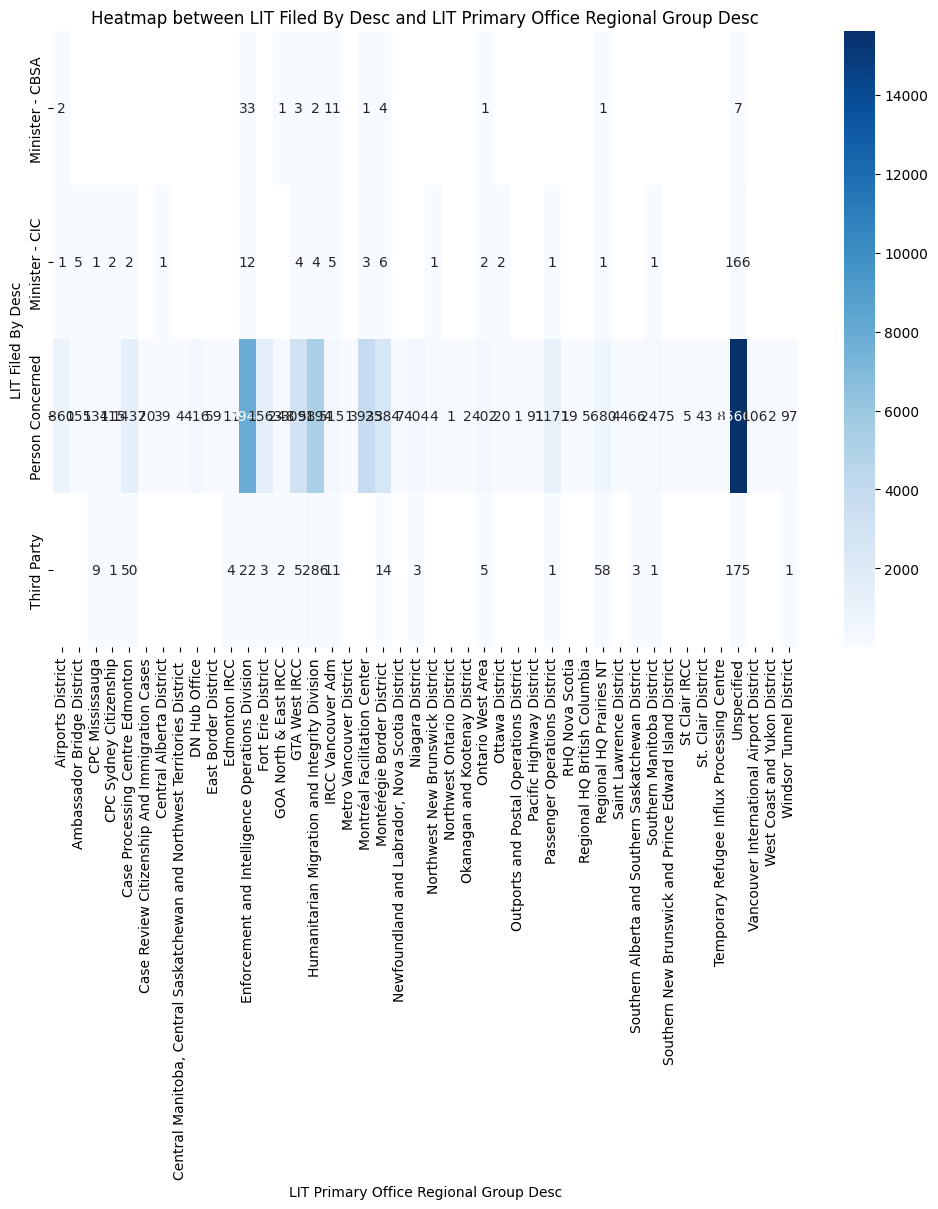

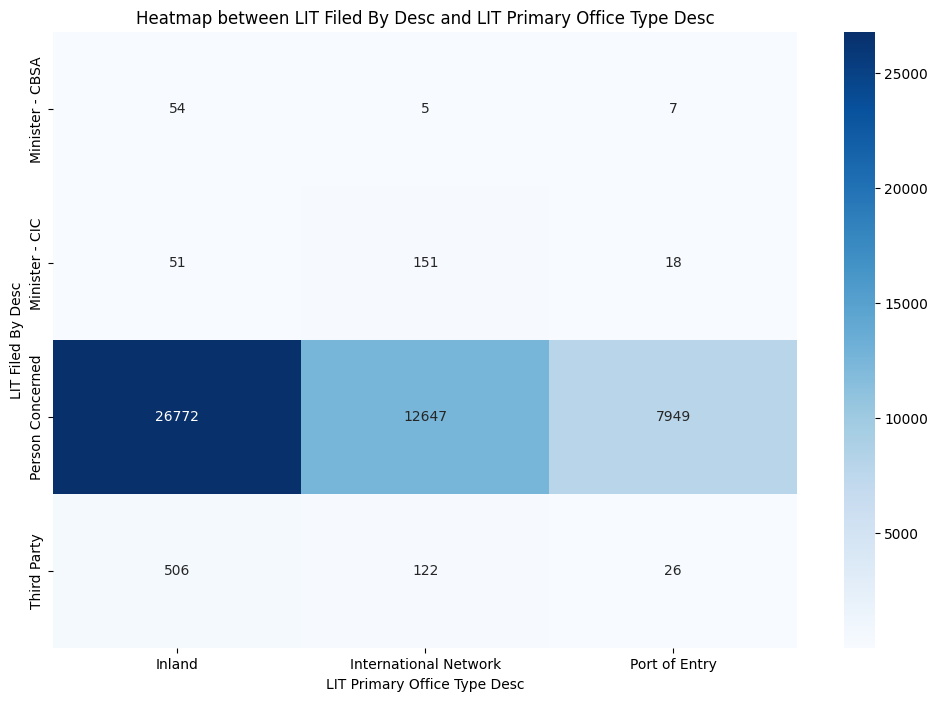

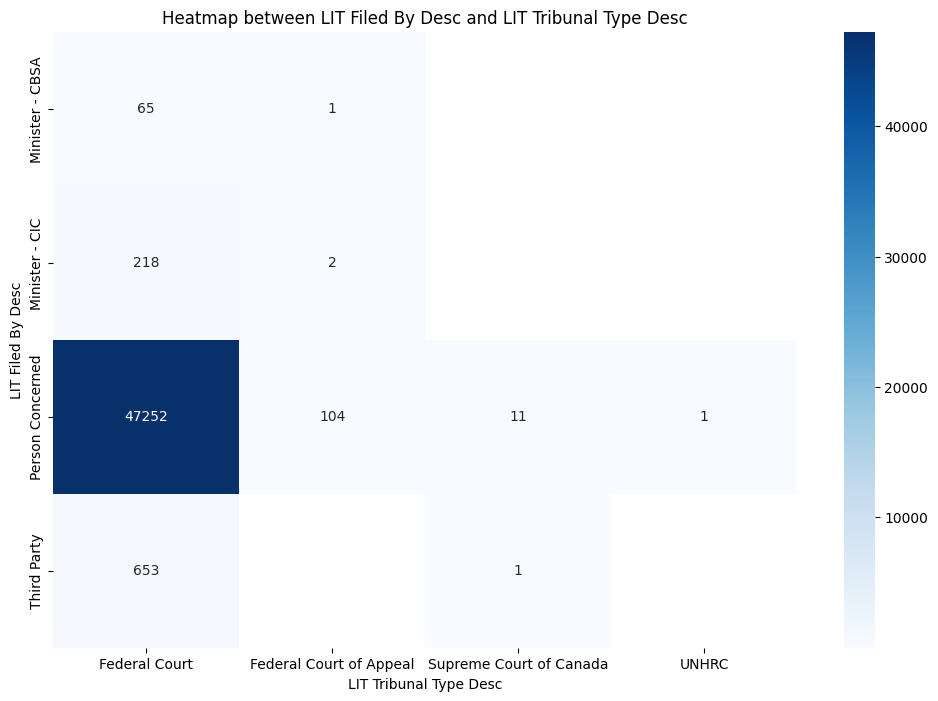

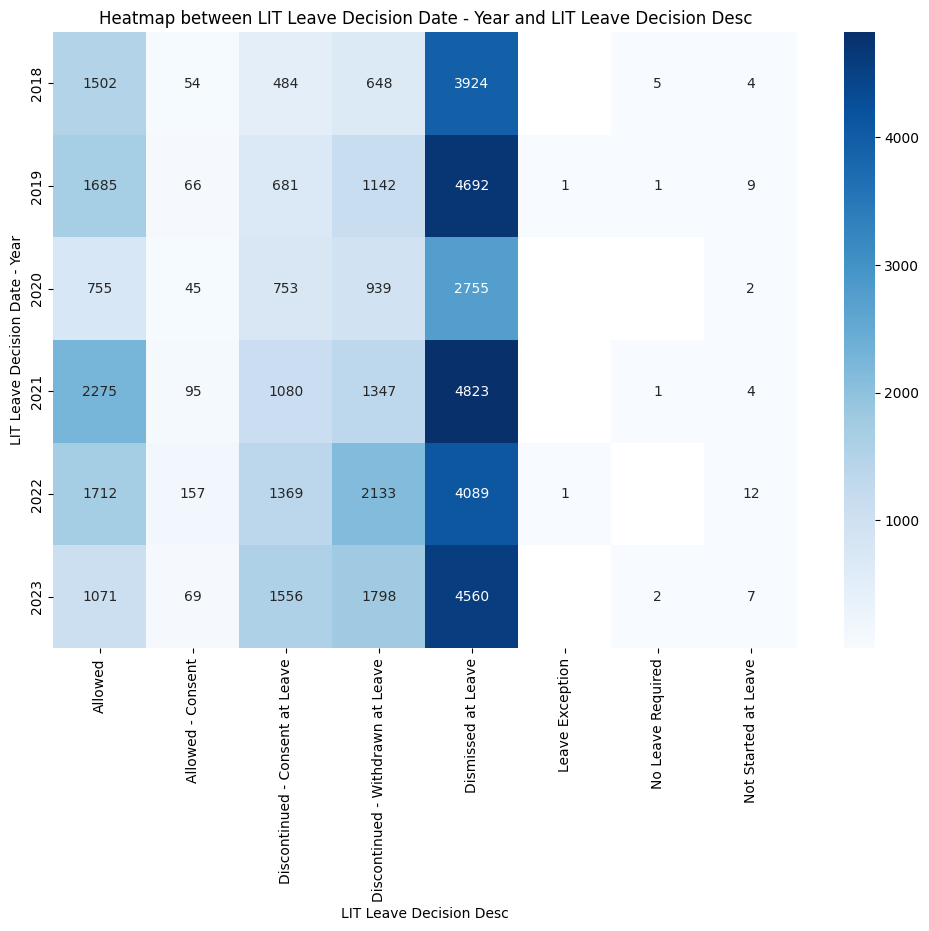

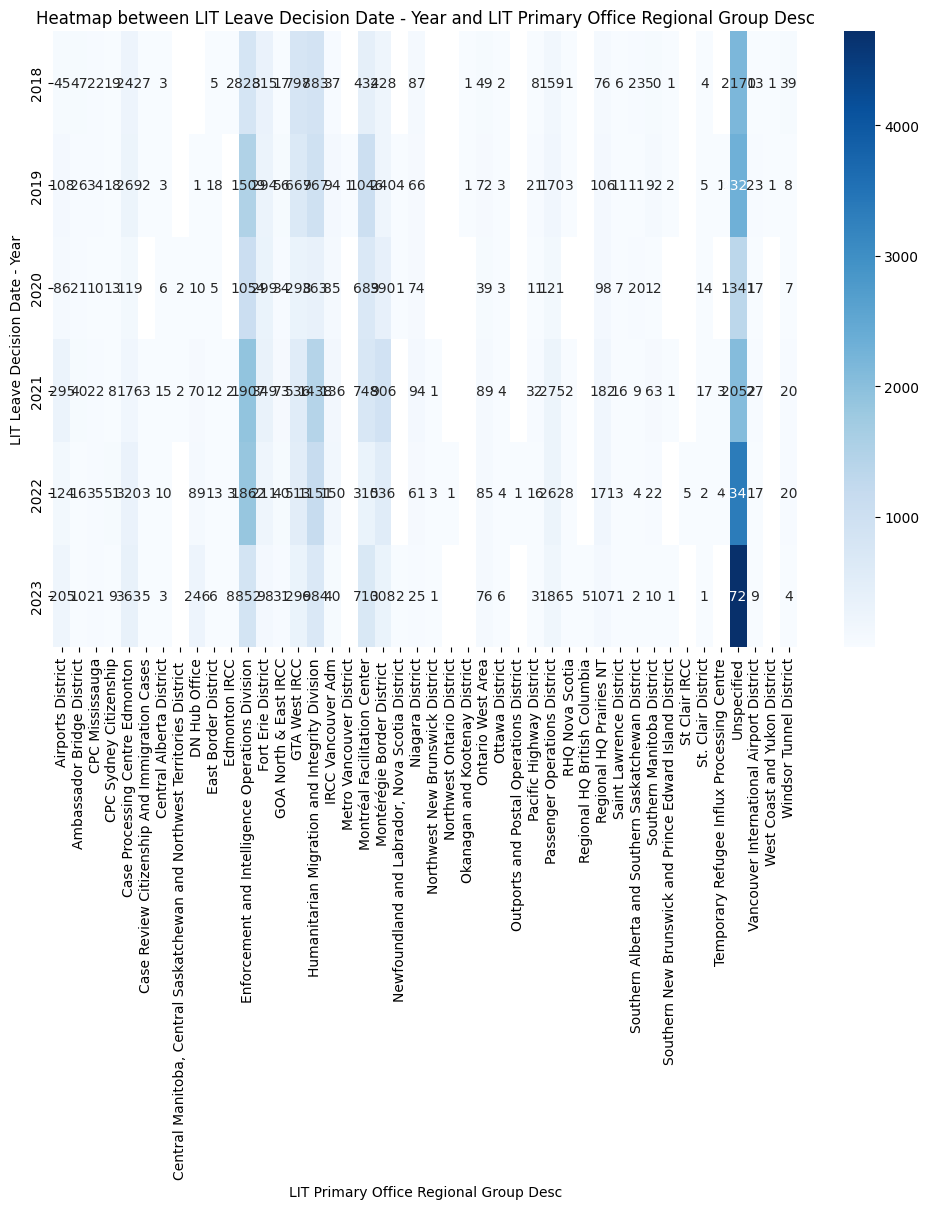

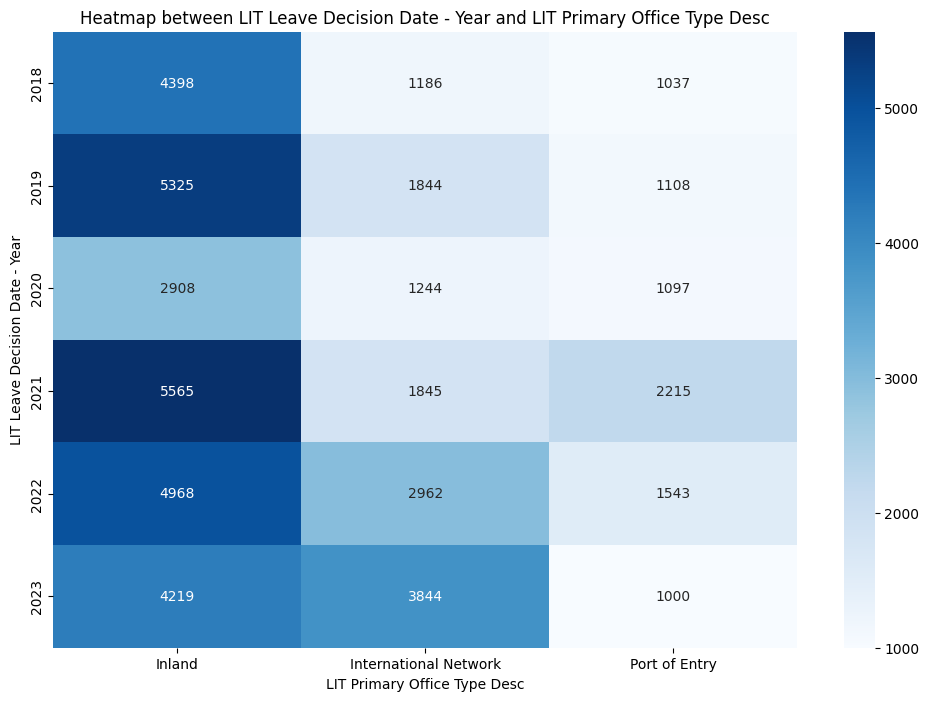

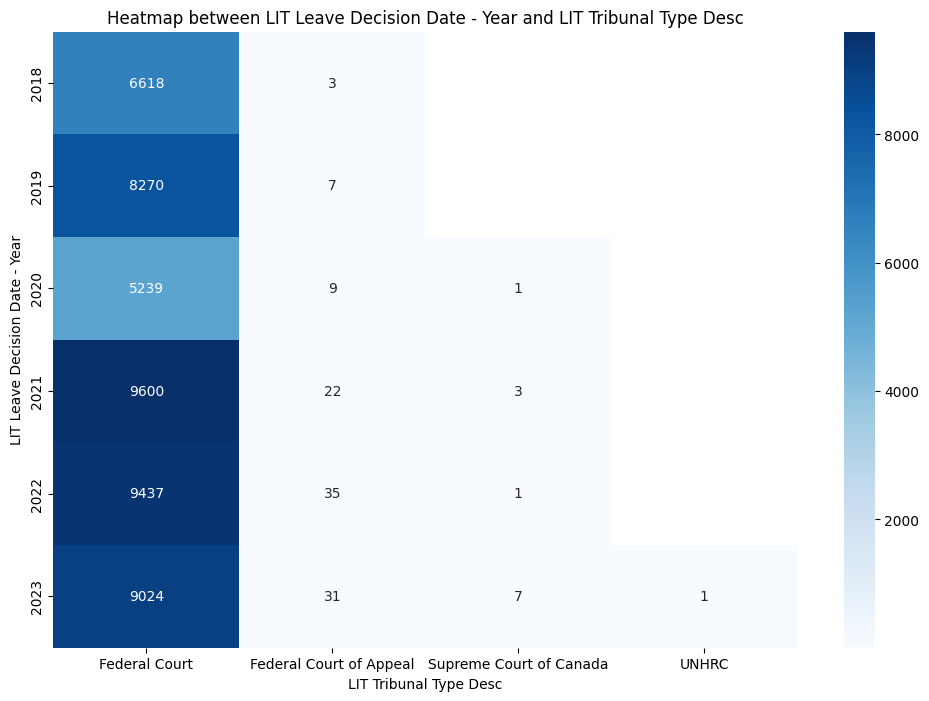

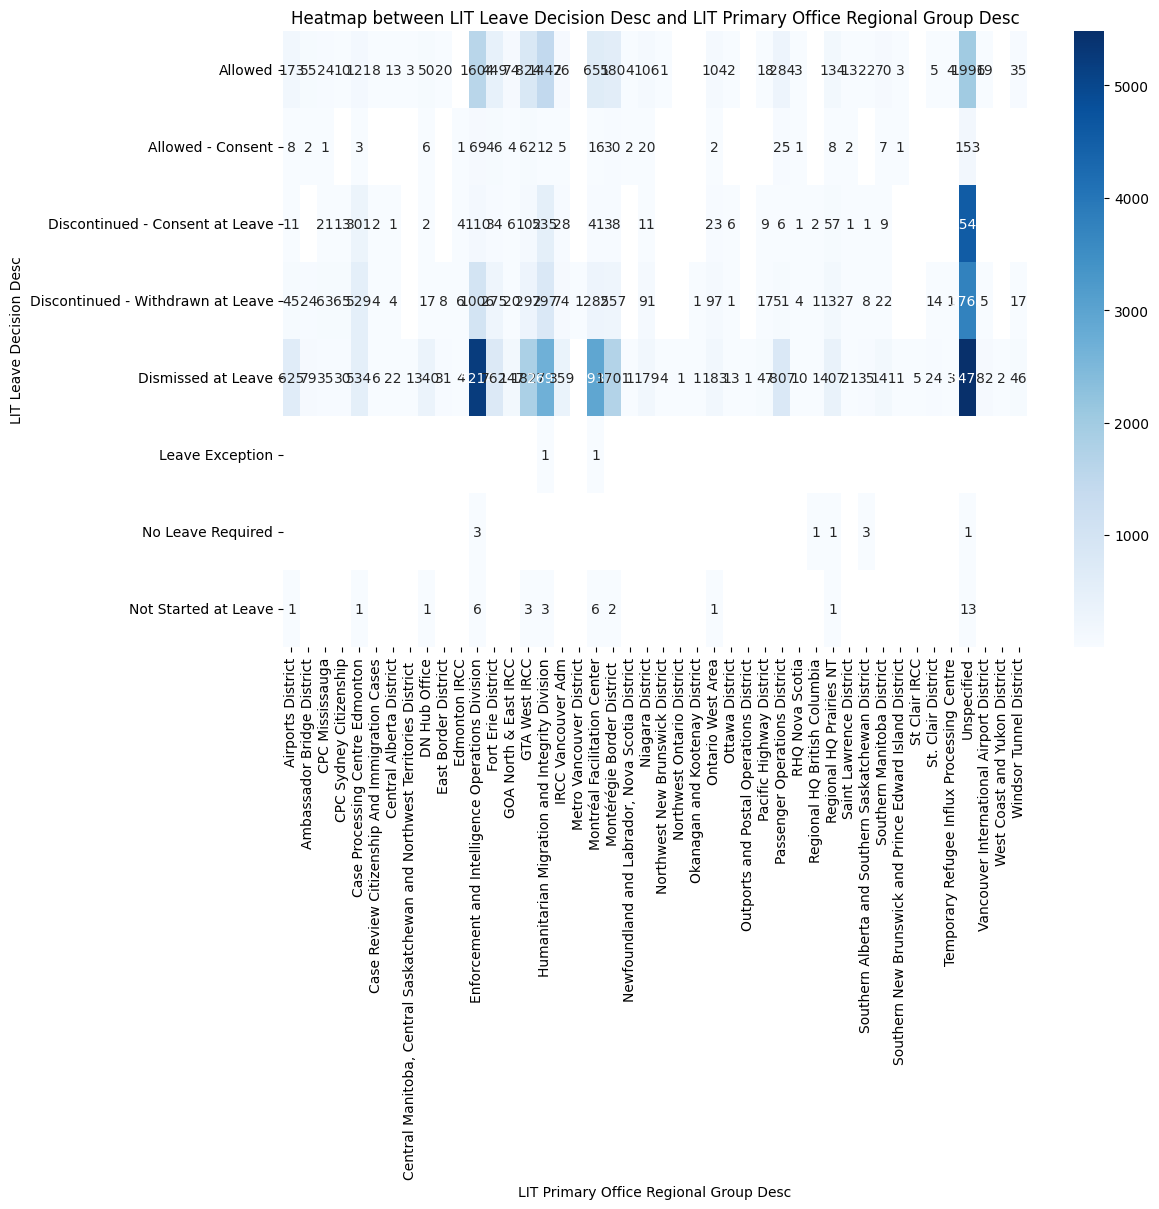

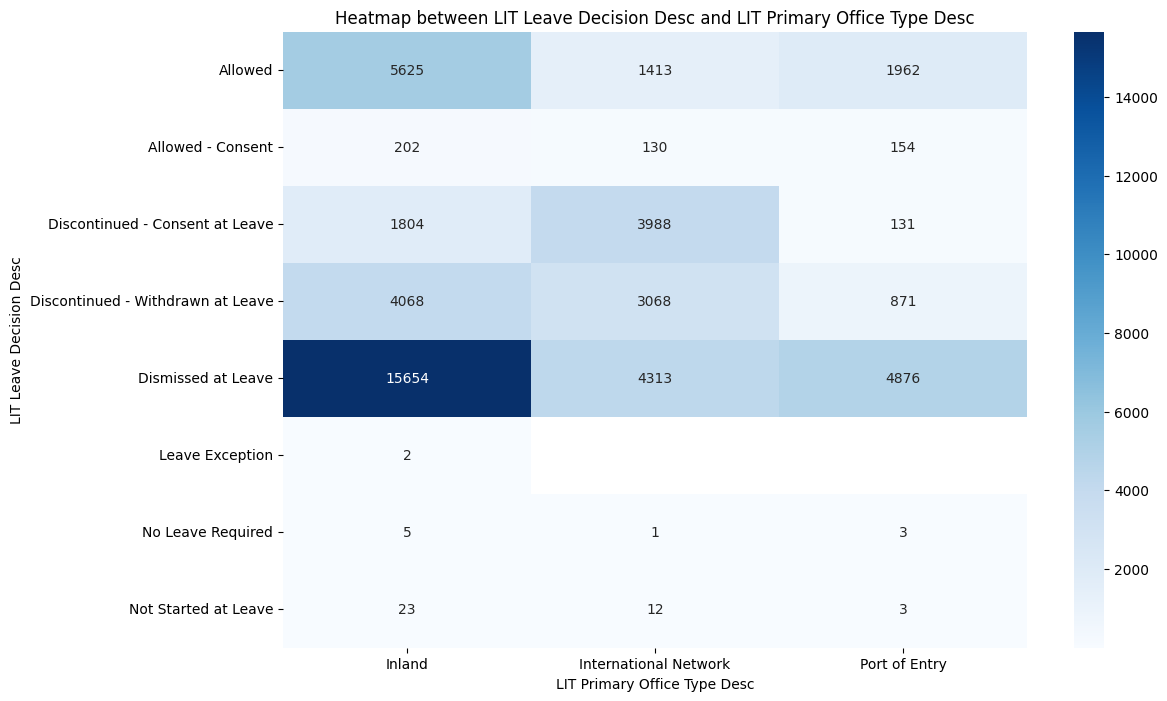

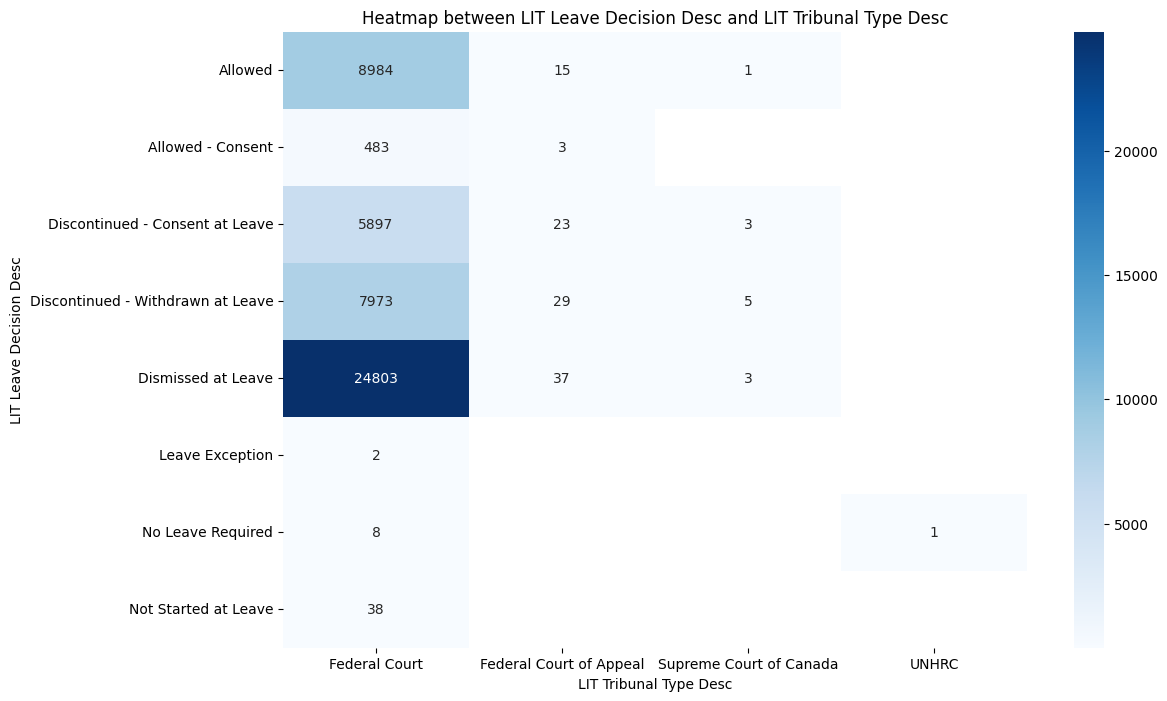

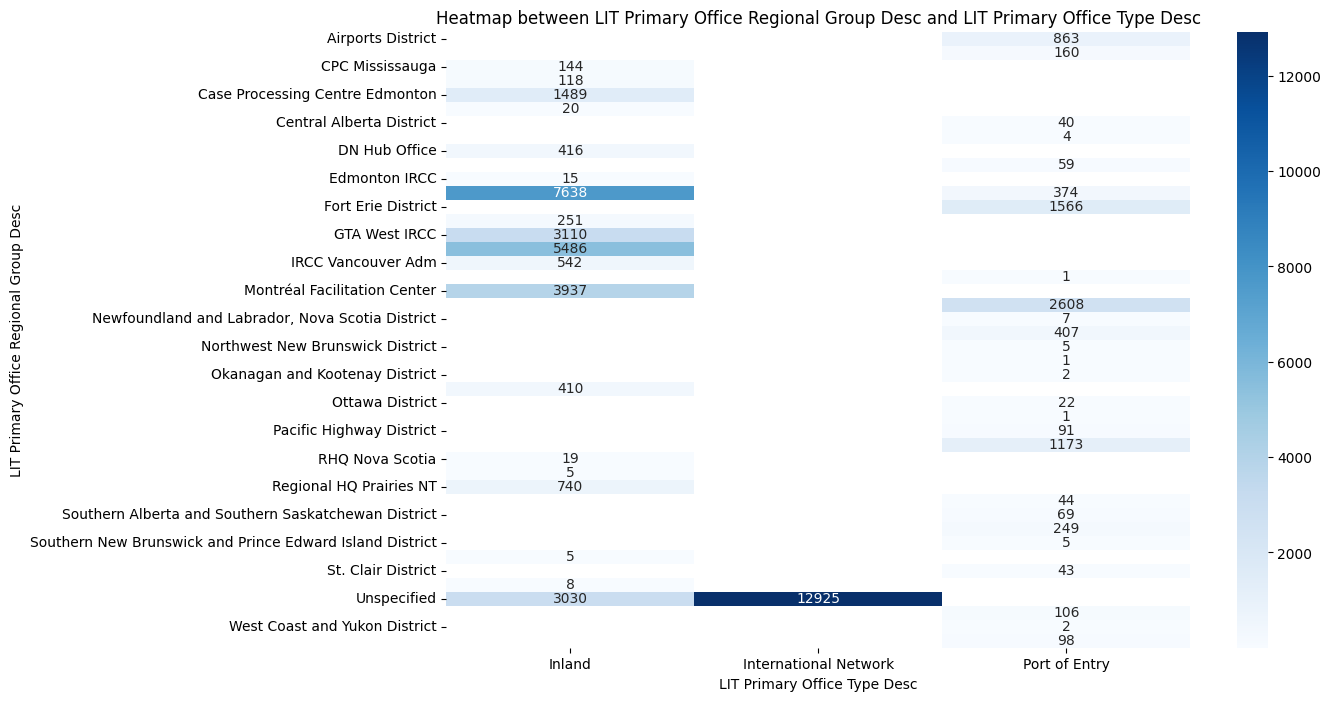

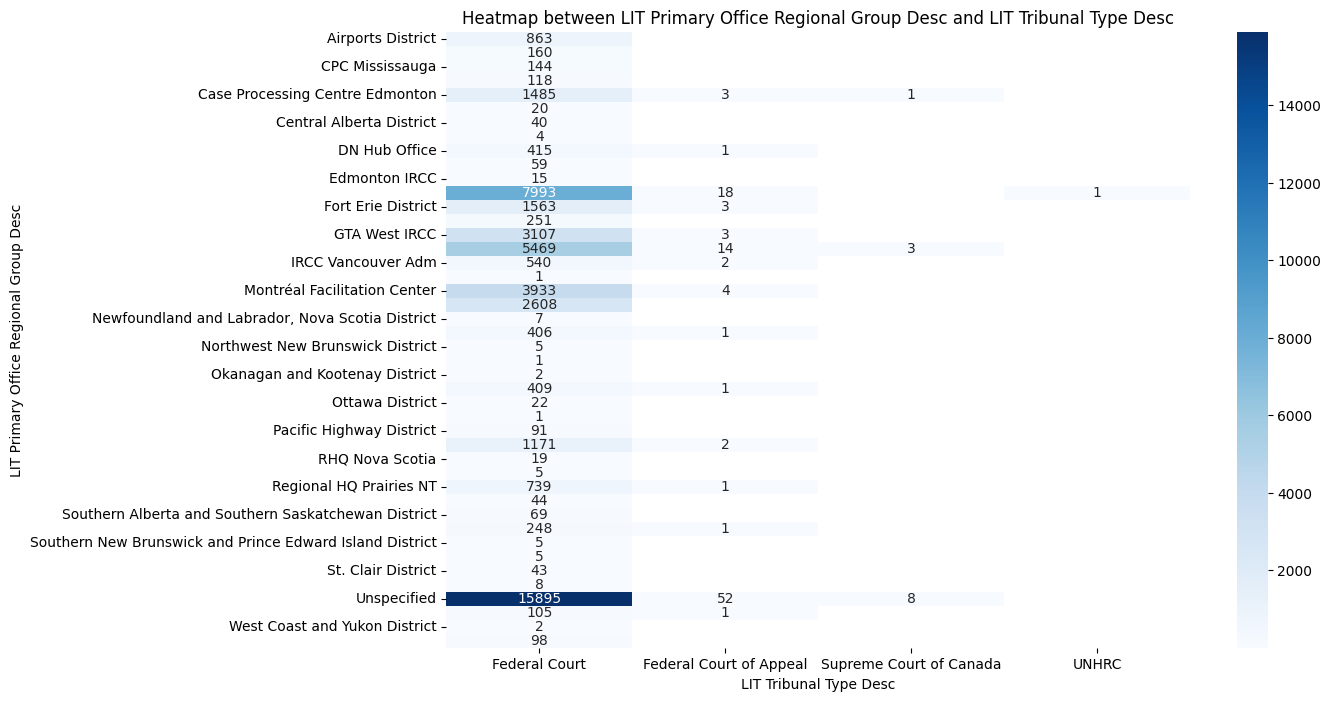

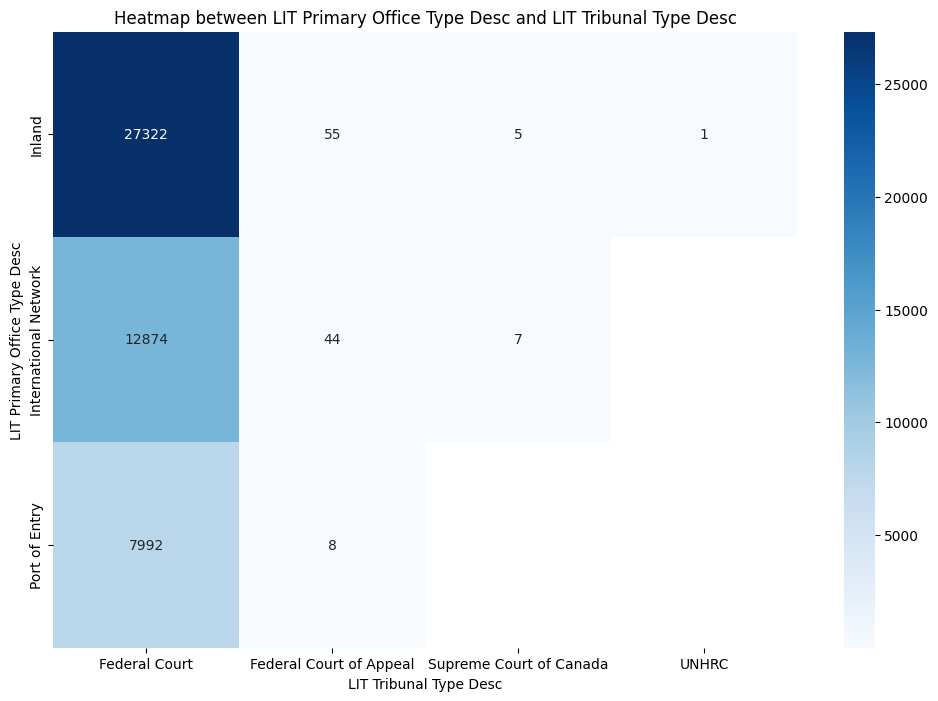

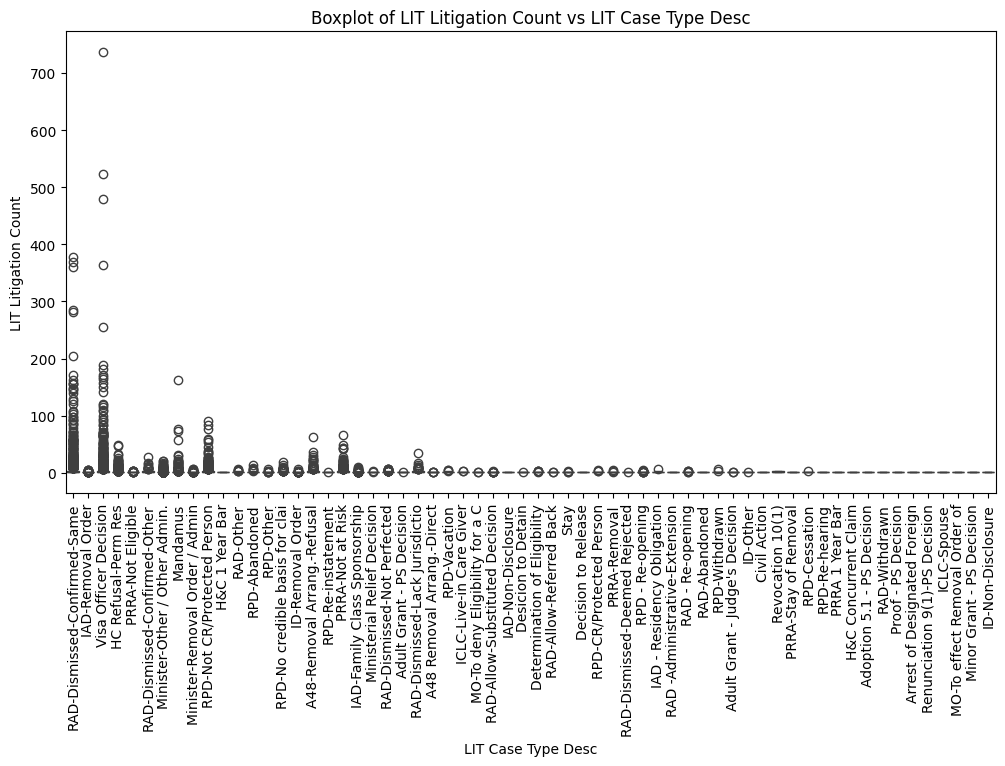

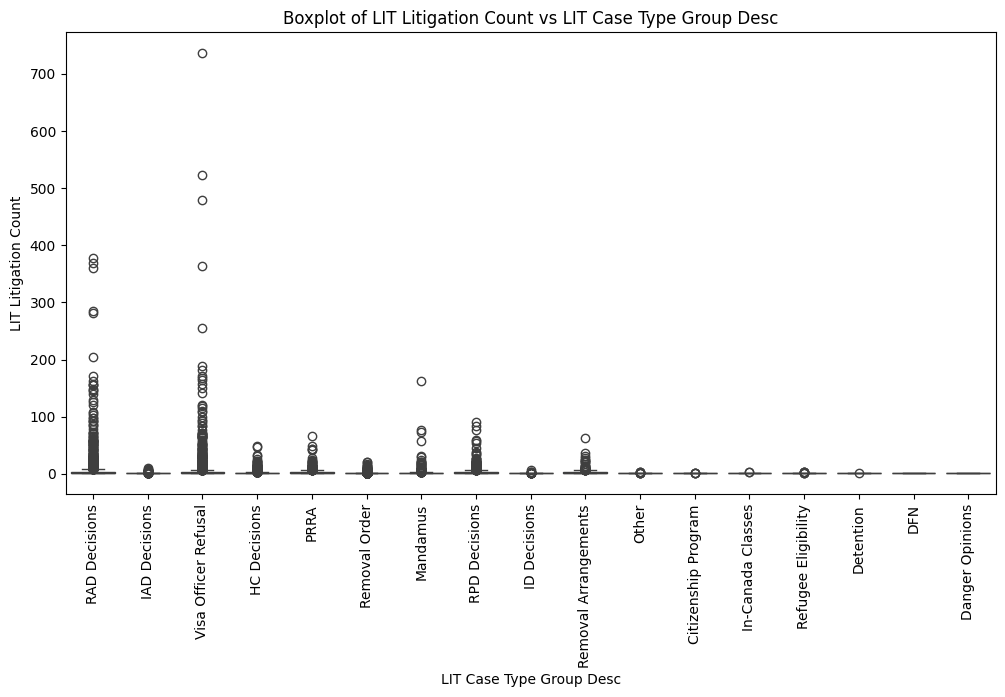

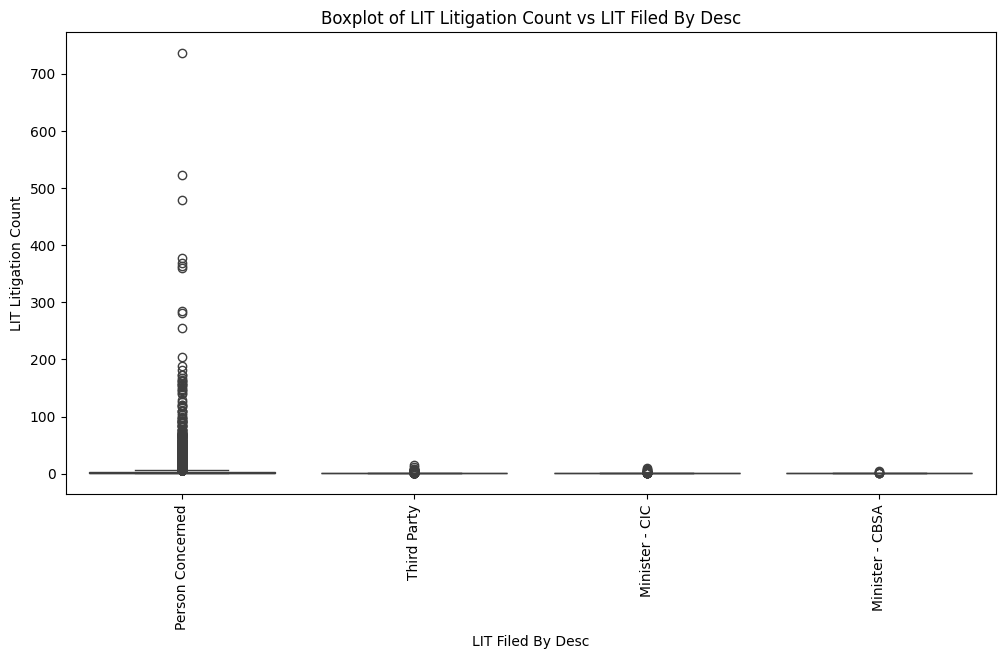

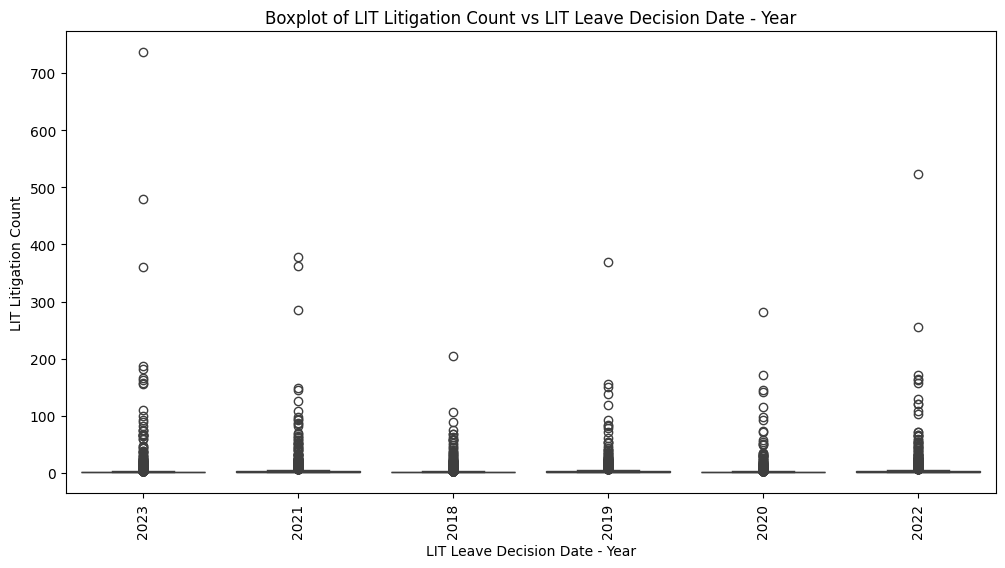

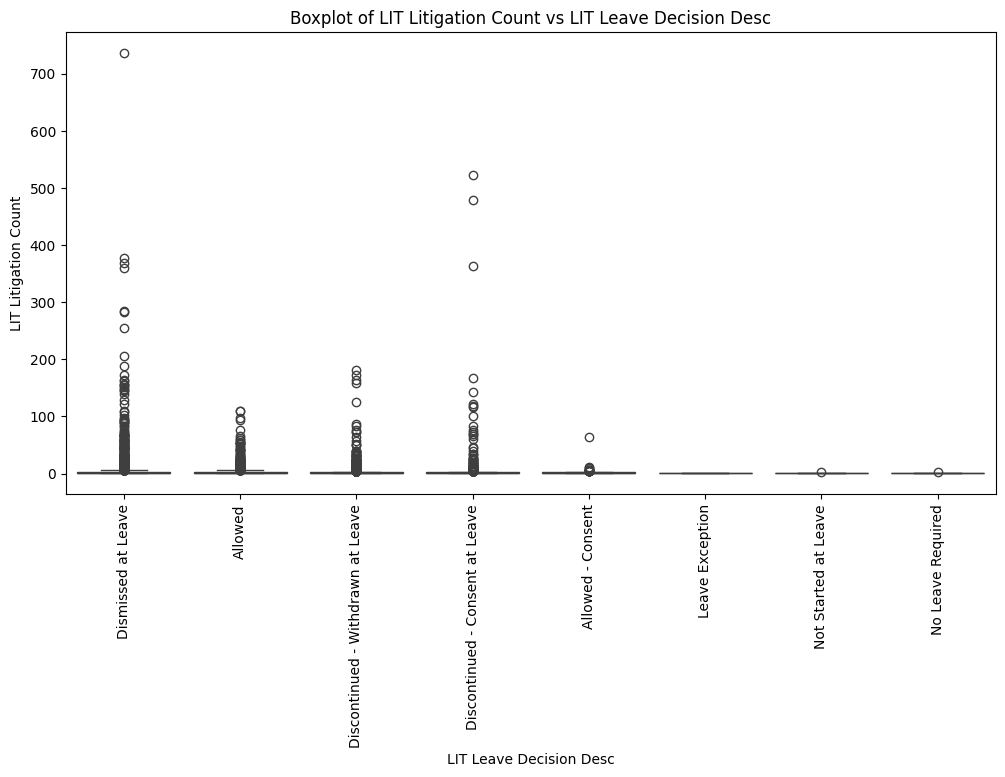

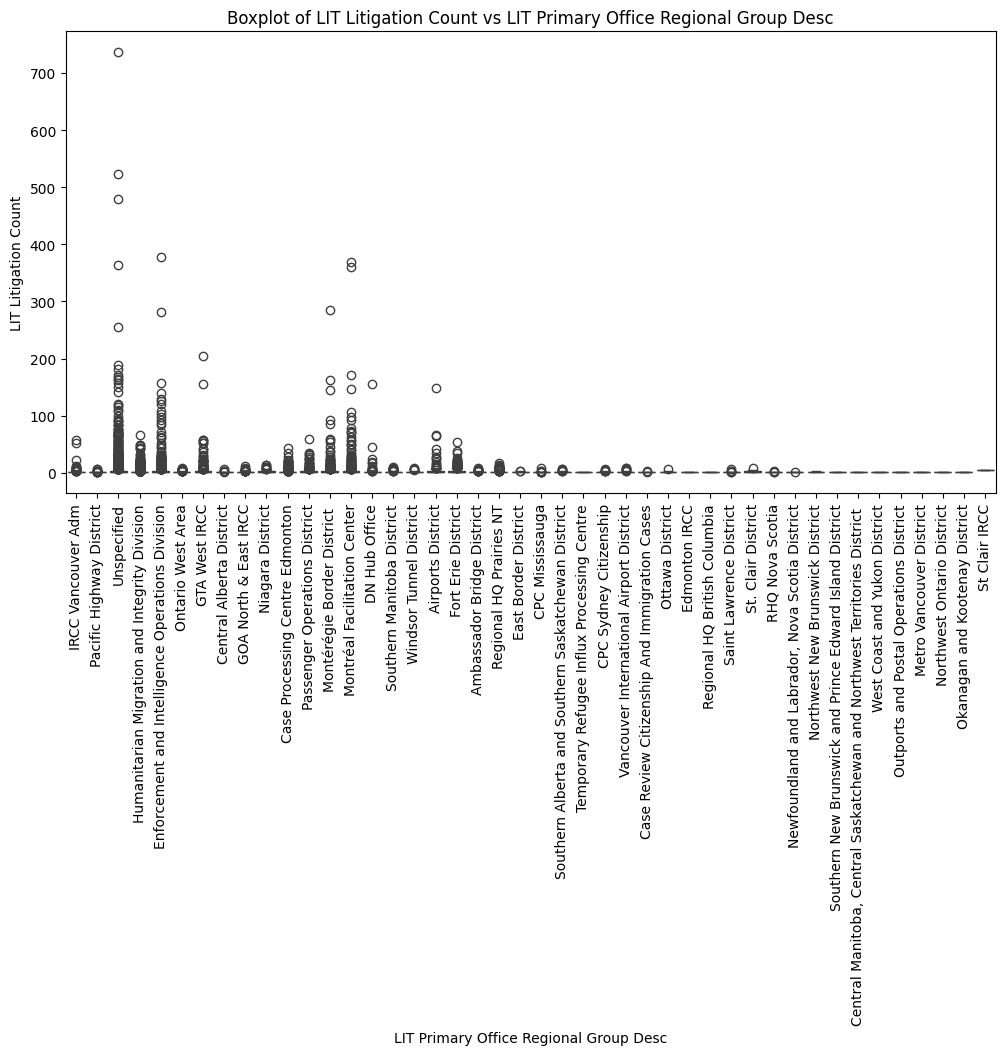

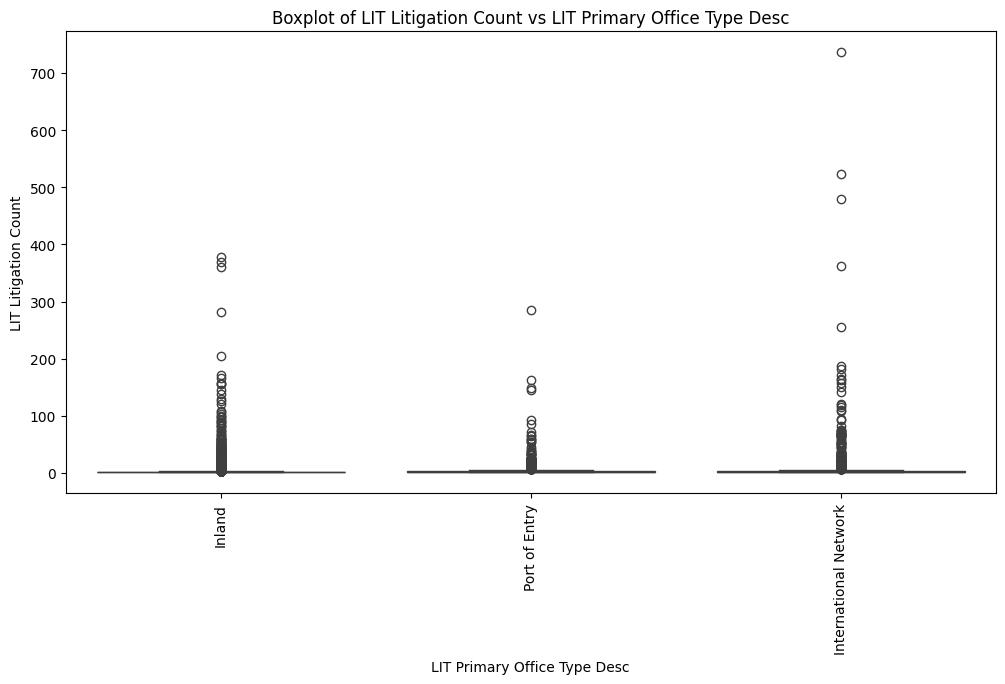

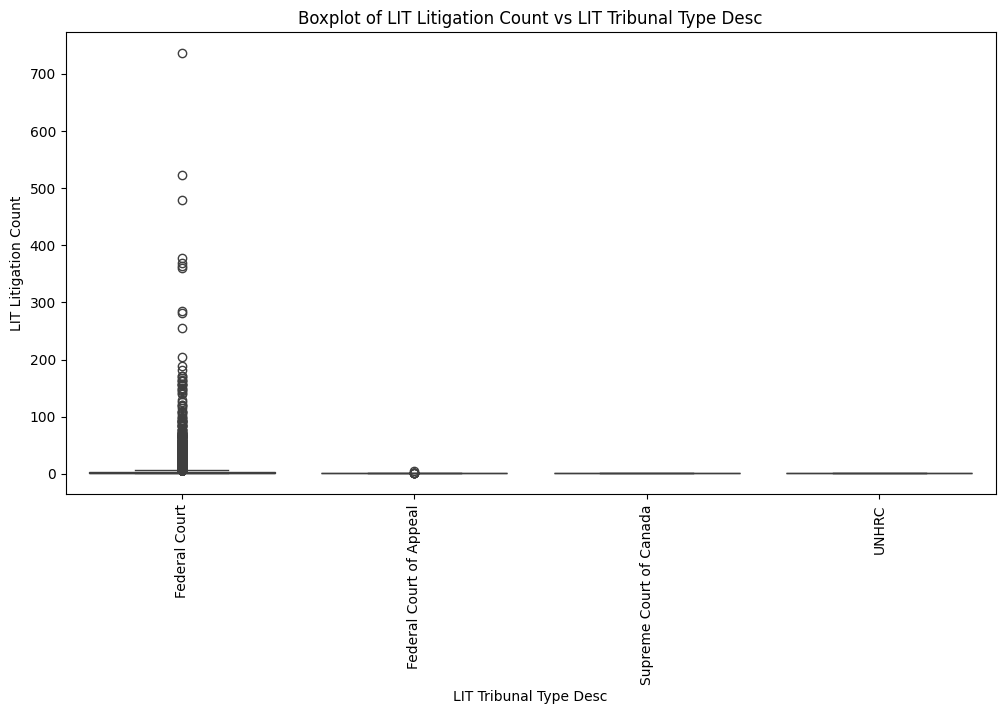

In [10]:
top_categories = df['Country of Citizenship'].value_counts().head(10).index

# 1. Analyze 'Country of Citizenship' with its top 10 values only
country_of_citizenship_data = df[df['Country of Citizenship'].isin(top_categories)]
country_lit_count = country_of_citizenship_data.groupby('Country of Citizenship')['LIT Litigation Count'].sum().loc[top_categories]
plt.figure(figsize=(12, 6))
sns.barplot(x=country_lit_count.index, y=country_lit_count.values)
plt.title('Top 10 Countries of Citizenship (Weighted by LIT Litigation Count)')
plt.xticks(rotation=90)

categorical_columns = df.select_dtypes(include='object').columns.difference(['Country of Citizenship'])

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 < col2:  
            cross_tab = pd.pivot_table(df, values='LIT Litigation Count', index=col1, columns=col2, aggfunc='sum')
            plt.figure(figsize=(12, 8))
            sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='.0f')
            plt.title(f"Heatmap between {col1} and {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


# 3. Analyze relationship between categorical features and LIT Litigation Count
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y="LIT Litigation Count", data=df)
    plt.title(f"Boxplot of LIT Litigation Count vs {column}")
    plt.xticks(rotation=90) 
    plt.show()